In [30]:
"""
Cornell Musculoskeletal Discomfort Questionnaire (CMDQ) Analysis for VR Headsets

BACKGROUND:
The Cornell Musculoskeletal Discomfort Questionnaire (CMDQ) was developed by Dr. Alan Hedge 
and ergonomics graduate students at Cornell University. It is based on published research 
studies of musculoskeletal discomfort among office workers and is designed as a research 
screening tool (not for diagnostic purposes).

ORIGINAL CMDQ SCORING METHODOLOGY:
The CMDQ typically uses four scoring approaches:
1. Count of symptoms per person
2. Sum of rating values for each person  
3. Weighted frequency scores: Never=0, 1-2 times/week=1.5, 3-4 times/week=3.5, 
   Every day=5, Several times/day=10
4. Composite score: Frequency × Discomfort × Interference

ADAPTATION FOR SINGLE-SESSION VR STUDY:
Since this study involves a single VR session rather than longitudinal workplace exposure,
the frequency component of the original CMDQ is not applicable. Instead, this analysis focuses on:

- BINARY OUTCOMES: Whether participants experienced pain/discomfort (Yes/No)
- DISCOMFORT SEVERITY: Level of discomfort when pain was experienced
  - Slightly Uncomfortable (1)
  - Moderately Uncomfortable (2) 
  - Very Uncomfortable (3)
- INTERFERENCE LEVEL: How much the discomfort interfered with the task
  - Not at all (1)
  - Slightly Interfered (2)
  - Substantially Interfered (3)

COMPOSITE SCORING FOR THIS STUDY:
For participants who experienced discomfort, we calculate:
Composite Score = Discomfort Level + Interference Level

This provides a severity index ranging from 2-6 for those who experienced discomfort,
with higher scores indicating more severe impact.

STATISTICAL APPROACH:
1. Binary Analysis: Chi-square or Fisher's exact tests for pain occurrence rates
2. Severity Analysis: Blocked ANOVA accounting for repeated measures (participants 
   testing multiple headsets)
3. Post-hoc comparisons when significant differences are found

VALIDITY NOTE:
The CMDQ has high face validity and has been validated in multiple studies. The adaptation
for single-session VR use maintains the core discomfort and interference assessments while
removing the inapplicable frequency component.

REFERENCE:
Hedge, A., Morimoto, S. And McCrobie, D. (1999) Effects of keyboard tray geometry on 
upper body posture and comfort, Ergonomics, 42 (10), 1333-1349.
"""

"\nCornell Musculoskeletal Discomfort Questionnaire (CMDQ) Analysis for VR Headsets\n\nBACKGROUND:\nThe Cornell Musculoskeletal Discomfort Questionnaire (CMDQ) was developed by Dr. Alan Hedge \nand ergonomics graduate students at Cornell University. It is based on published research \nstudies of musculoskeletal discomfort among office workers and is designed as a research \nscreening tool (not for diagnostic purposes).\n\nORIGINAL CMDQ SCORING METHODOLOGY:\nThe CMDQ typically uses four scoring approaches:\n1. Count of symptoms per person\n2. Sum of rating values for each person  \n3. Weighted frequency scores: Never=0, 1-2 times/week=1.5, 3-4 times/week=3.5, \n   Every day=5, Several times/day=10\n4. Composite score: Frequency × Discomfort × Interference\n\nADAPTATION FOR SINGLE-SESSION VR STUDY:\nSince this study involves a single VR session rather than longitudinal workplace exposure,\nthe frequency component of the original CMDQ is not applicable. Instead, this analysis focuses on:\

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal, mannwhitneyu
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\ITXPC\OneDrive - The Pennsylvania State University\Amir_abb6024\ICCMJournal\Codes\VRUsability\MuscolosekeletalDiscomfortQuestionnaire.csv')

In [3]:
df.head()

,Timestamp,UniqueID,HeadSet,Did you experience pain,"If so, how uncomfortable was the pain","If you experienced pain, ache, discomfort, did this interfere with your ability to work?",Did you experience pain.1,"If so, how uncomfortable was the pain.1","If you experienced pain, ache, discomfort, did this interfere with your ability to work?.1",Gender
0,2/25/2025 13:01,0,HTC,No,Not Applicable,Not Applicable,No,Not Applicable,Not Applicable,Male
1,2/25/2025 13:24,0,Oculus,No,Not Applicable,Not Applicable,No,Not Applicable,Not Applicable,Male
2,2/25/2025 13:41,0,HP,No,Not Applicable,Not Applicable,No,Not Applicable,Not Applicable,Male
3,3/3/2025 13:00,1,HTC,No,Not Applicable,Not Applicable,No,Not Applicable,Not Applicable,Male
4,3/3/2025 13:18,1,HP,No,Not Applicable,Not Applicable,No,Not Applicable,Not Applicable,Male


In [4]:
df.loc[df['HeadSet'] =='HTC ','HeadSet'] = 'HTC'
df.HeadSet.unique()

array(['HTC', 'Oculus', 'HP'], dtype=object)

In [5]:
df['If so, how uncomfortable was the pain'].unique()

array(['Not Applicable', 'Slightly Uncomfortable',
       'Moderately Uncomfortable', 'Very Uncomfortable'], dtype=object)

In [6]:
df[df['If you experienced pain, ache, discomfort, did this interfere with your ability to work?.1'].isna()]

,Timestamp,UniqueID,HeadSet,Did you experience pain,"If so, how uncomfortable was the pain","If you experienced pain, ache, discomfort, did this interfere with your ability to work?",Did you experience pain.1,"If so, how uncomfortable was the pain.1","If you experienced pain, ache, discomfort, did this interfere with your ability to work?.1",Gender


In [7]:
score_mapping_pain = {'Not Applicable': 0, 'Slightly Uncomfortable': 1, 'Moderately Uncomfortable': 2, 'Very Uncomfortable': 3}
score_mapping_iterference = {'Not at all': 1, "Slightly Interfered": 2, "Substantially Interfered": 3, "Not Applicable": 0}

In [8]:
# change the values in the 'Pain' and 'Interference' columns to numeric values
df['If so, how uncomfortable was the pain (Neck)'] = df['If so, how uncomfortable was the pain'].map(score_mapping_pain)
df['If so, how uncomfortable was the pain (Upper Back)'] = df['If so, how uncomfortable was the pain.1'].map(score_mapping_pain)
df['If you experienced pain, ache, discomfort, did this interfere with your ability to work? (Neck)'] = df['If you experienced pain, ache, discomfort, did this interfere with your ability to work?'].map(score_mapping_iterference)
df['If you experienced pain, ache, discomfort, did this interfere with your ability to work? (Upper Back)'] = df['If you experienced pain, ache, discomfort, did this interfere with your ability to work?.1'].map(score_mapping_iterference)

In [9]:
df['Neck Score'] = df['If so, how uncomfortable was the pain (Neck)'] + df['If you experienced pain, ache, discomfort, did this interfere with your ability to work? (Neck)']
df['Upper Back Score'] = df['If so, how uncomfortable was the pain (Upper Back)'] + df['If you experienced pain, ache, discomfort, did this interfere with your ability to work? (Upper Back)']


Data overview:
Total observations: 72
Unique participants: 24
Headsets: ['HTC' 'Oculus' 'HP']
Gender distribution: Gender
Female    39
Male      33
Name: count, dtype: int64
Observations per participant: 3    24
Name: count, dtype: int64

Missing values in Neck Score: 0
Missing values in Upper Back Score: 0
Missing values in Gender: 0

Data after removing missing values: 72 observations

Descriptive Statistics by HeadSet and Gender:
Neck Score:
                count   mean    std
HeadSet Gender                     
HP      Female     13  2.000  2.041
        Male       11  0.545  1.293
HTC     Female     13  1.615  1.758
        Male       11  0.909  1.578
Oculus  Female     13  1.000  1.414
        Male       11  0.455  1.036

Upper Back Score:
                count   mean    std
HeadSet Gender                     
HP      Female     13  1.154  1.994
        Male       11  0.273  0.905
HTC     Female     13  0.769  1.589
        Male       11  0.636  1.433
Oculus  Female     13  0.692

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

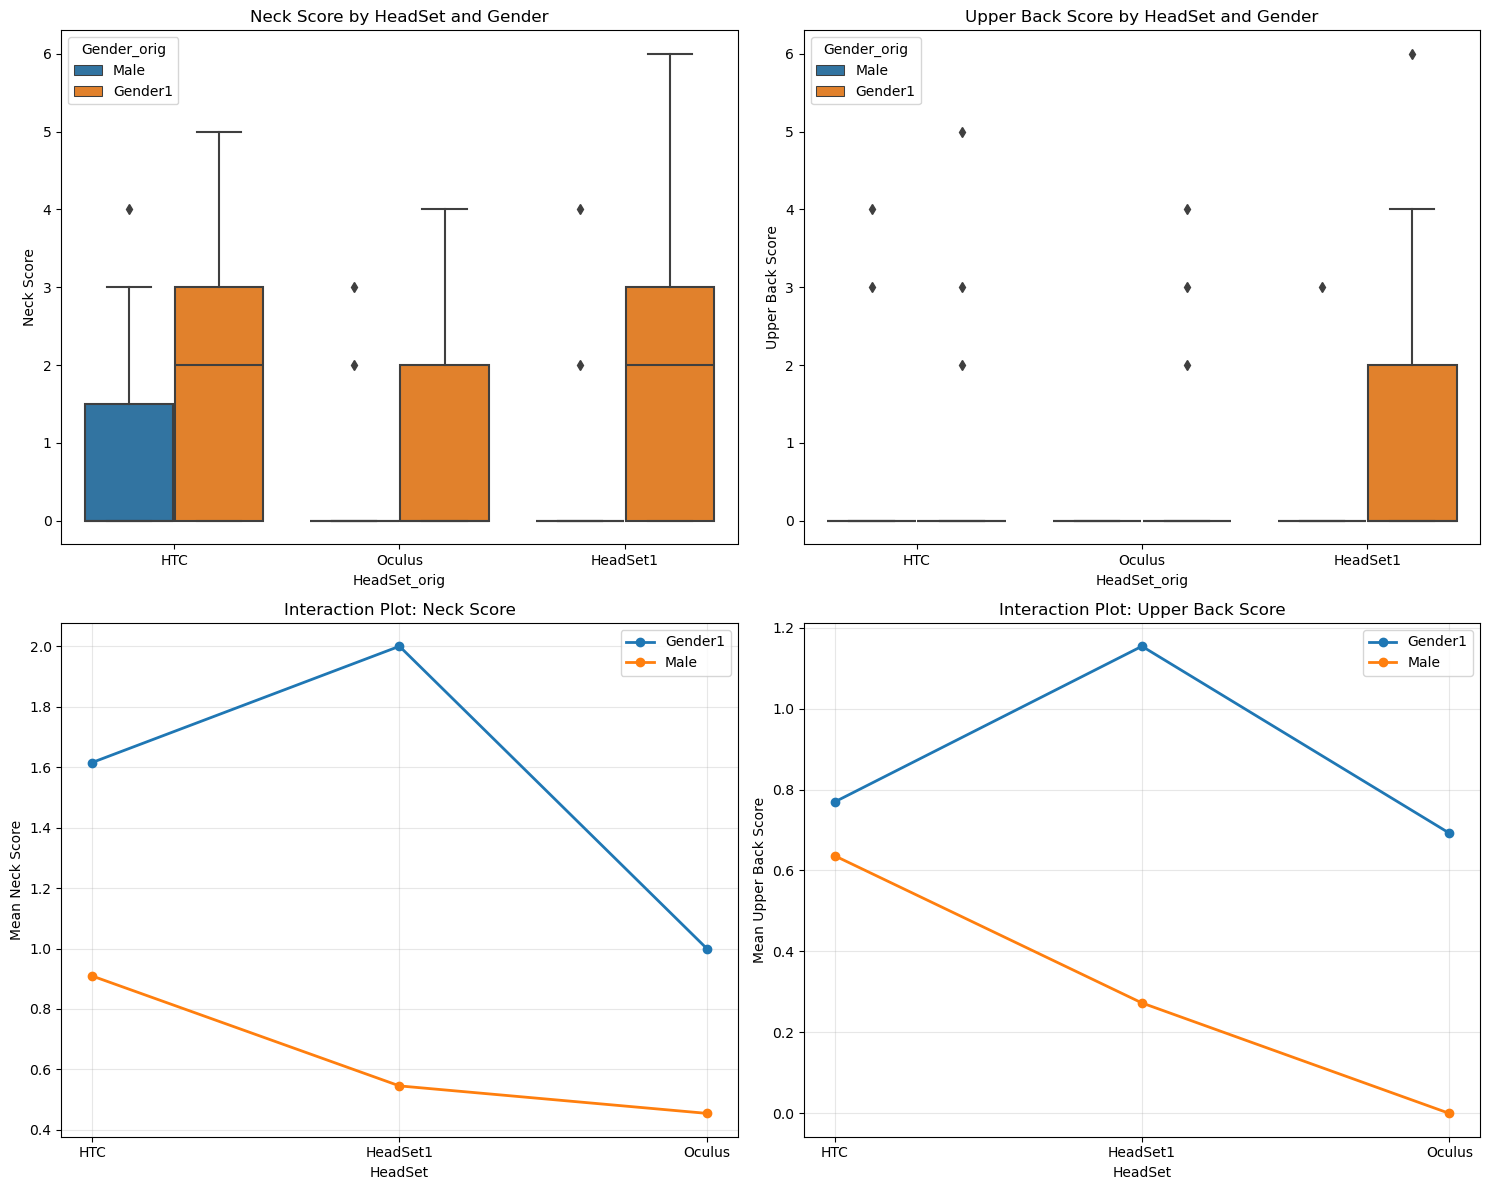


SUMMARY OF MIXED EFFECTS MODEL RESULTS
Empty DataFrame
Columns: []
Index: []

MODEL FIT STATISTICS
Neck Score Model:
  Log-Likelihood: -128.316
  AIC: nan
  BIC: nan

Upper Back Score Model:
  Log-Likelihood: -108.525
  AIC: nan
  BIC: nan

ANALYSIS COMPLETE
Note: Mixed effects models account for the correlation between
observations from the same participant (UniqueID) through
random intercepts, providing more appropriate standard errors
and p-values than traditional ANOVA for repeated measures data.


In [39]:
import pandas as pd
import numpy as np
from statsmodels.regression.mixed_linear_model import MixedLM
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import tukey_hsd

# First, let's examine the data structure including gender
print("Data overview:")
print(f"Total observations: {len(df)}")
print(f"Unique participants: {df['UniqueID'].nunique()}")
print(f"Headsets: {df['HeadSet'].unique()}")
print(f"Gender distribution: {df['Gender'].value_counts()}")
print(f"Observations per participant: {df.groupby('UniqueID').size().value_counts()}")

# Check for missing values in our variables of interest
print(f"\nMissing values in Neck Score: {df['Neck Score'].isna().sum()}")
print(f"Missing values in Upper Back Score: {df['Upper Back Score'].isna().sum()}")
print(f"Missing values in Gender: {df['Gender'].isna().sum()}")

# Remove any rows with missing values in the variables we're analyzing
df_clean = df.dropna(subset=['Neck Score', 'Upper Back Score', 'UniqueID', 'HeadSet', 'Gender'])

print(f"\nData after removing missing values: {len(df_clean)} observations")

# Descriptive statistics by headset and gender
print("\nDescriptive Statistics by HeadSet and Gender:")
print("Neck Score:")
print(df_clean.groupby(['HeadSet', 'Gender'])['Neck Score'].agg(['count', 'mean', 'std']).round(3))
print("\nUpper Back Score:")
print(df_clean.groupby(['HeadSet', 'Gender'])['Upper Back Score'].agg(['count', 'mean', 'std']).round(3))

# ============================================================================
# MIXED EFFECTS MODEL ANALYSIS WITH GENDER
# ============================================================================

print("\n" + "="*60)
print("MIXED EFFECTS MODEL ANALYSIS WITH GENDER")
print("="*60)

# Create dummy variables for categorical predictors
df_clean = pd.get_dummies(df_clean, columns=['HeadSet', 'Gender'], prefix=['HeadSet', 'Gender'], drop_first=True)

# Get the dummy column names for later use
headset_cols = [col for col in df_clean.columns if col.startswith('HeadSet_')]
gender_cols = [col for col in df_clean.columns if col.startswith('Gender_')]

print(f"HeadSet dummy variables: {headset_cols}")
print(f"Gender dummy variables: {gender_cols}")

# Analysis 1: Neck Score Mixed Effects Model
print("\n1. MIXED EFFECTS MODEL FOR NECK SCORE")
print("-" * 50)

# Create interaction terms
interaction_cols = []
for hcol in headset_cols:
    for gcol in gender_cols:
        interaction_col = f"{hcol}_{gcol}"
        df_clean[interaction_col] = df_clean[hcol] * df_clean[gcol]
        interaction_cols.append(interaction_col)

# Prepare the fixed effects formula
fixed_effects = headset_cols + gender_cols + interaction_cols
formula_fixed = ' + '.join(fixed_effects)

print(f"Fixed effects formula: {formula_fixed}")

# Fit Mixed Effects Model for Neck Score
# UniqueID is the grouping variable (random intercept)
try:
    neck_mixed_model = MixedLM.from_formula(
        f'Q("Neck Score") ~ {formula_fixed}', 
        data=df_clean, 
        groups=df_clean['UniqueID']
    ).fit()
    
    print("\nMixed Effects Model Results for Neck Score:")
    print(neck_mixed_model.summary())
    
    # Extract key statistics
    neck_params = neck_mixed_model.params
    neck_pvalues = neck_mixed_model.pvalues
    
    print(f"\nKey Results for Neck Score:")
    for param in neck_params.index:
        if param != 'Intercept':
            print(f"{param}: Coef = {neck_params[param]:.4f}, p = {neck_pvalues[param]:.4f}, "
                  f"Significant: {'Yes' if neck_pvalues[param] < 0.05 else 'No'}")
    
    # Random effects variance components
    print(f"\nRandom Effects (UniqueID) Variance: {neck_mixed_model.cov_re.iloc[0,0]:.4f}")
    print(f"Residual Variance: {neck_mixed_model.scale:.4f}")
    print(f"ICC (Intraclass Correlation): {neck_mixed_model.cov_re.iloc[0,0] / (neck_mixed_model.cov_re.iloc[0,0] + neck_mixed_model.scale):.4f}")
    
except Exception as e:
    print(f"Error fitting Neck Score model: {e}")
    neck_mixed_model = None

# Analysis 2: Upper Back Score Mixed Effects Model
print("\n2. MIXED EFFECTS MODEL FOR UPPER BACK SCORE")
print("-" * 50)

try:
    back_mixed_model = MixedLM.from_formula(
        f'Q("Upper Back Score") ~ {formula_fixed}', 
        data=df_clean, 
        groups=df_clean['UniqueID']
    ).fit()
    
    print("\nMixed Effects Model Results for Upper Back Score:")
    print(back_mixed_model.summary())
    
    # Extract key statistics
    back_params = back_mixed_model.params
    back_pvalues = back_mixed_model.pvalues
    
    print(f"\nKey Results for Upper Back Score:")
    for param in back_params.index:
        if param != 'Intercept':
            print(f"{param}: Coef = {back_params[param]:.4f}, p = {back_pvalues[param]:.4f}, "
                  f"Significant: {'Yes' if back_pvalues[param] < 0.05 else 'No'}")
    
    # Random effects variance components
    print(f"\nRandom Effects (UniqueID) Variance: {back_mixed_model.cov_re.iloc[0,0]:.4f}")
    print(f"Residual Variance: {back_mixed_model.scale:.4f}")
    print(f"ICC (Intraclass Correlation): {back_mixed_model.cov_re.iloc[0,0] / (back_mixed_model.cov_re.iloc[0,0] + back_mixed_model.scale):.4f}")
    
except Exception as e:
    print(f"Error fitting Upper Back Score model: {e}")
    back_mixed_model = None

# ============================================================================
# ALTERNATIVE APPROACH: SEPARATE MODELS FOR MAIN EFFECTS AND INTERACTIONS
# ============================================================================

print("\n" + "="*60)
print("ALTERNATIVE APPROACH: TESTING EFFECTS SEPARATELY")
print("="*60)

# Model with main effects only
print("\n3. MAIN EFFECTS MODELS")
print("-" * 30)

main_effects_formula = ' + '.join(headset_cols + gender_cols)

# Neck Score - Main Effects
try:
    neck_main_model = MixedLM.from_formula(
        f'Q("Neck Score") ~ {main_effects_formula}', 
        data=df_clean, 
        groups=df_clean['UniqueID']
    ).fit()
    
    print("\nNeck Score - Main Effects Model:")
    print("Parameter estimates:")
    for param in neck_main_model.params.index:
        if param != 'Intercept':
            coef = neck_main_model.params[param]
            pval = neck_main_model.pvalues[param]
            print(f"  {param}: {coef:.4f} (p = {pval:.4f})")
    
except Exception as e:
    print(f"Error fitting Neck Score main effects model: {e}")

# Upper Back Score - Main Effects
try:
    back_main_model = MixedLM.from_formula(
        f'Q("Upper Back Score") ~ {main_effects_formula}', 
        data=df_clean, 
        groups=df_clean['UniqueID']
    ).fit()
    
    print("\nUpper Back Score - Main Effects Model:")
    print("Parameter estimates:")
    for param in back_main_model.params.index:
        if param != 'Intercept':
            coef = back_main_model.params[param]
            pval = back_main_model.pvalues[param]
            print(f"  {param}: {coef:.4f} (p = {pval:.4f})")
    
except Exception as e:
    print(f"Error fitting Upper Back Score main effects model: {e}")

# ============================================================================
# VISUALIZATION (Enhanced with original categorical variables)
# ============================================================================

# Recreate original categorical variables for visualization
# (Assuming original HeadSet and Gender were preserved or can be reconstructed)
# You may need to adjust this part based on your original data structure

print("\n" + "="*60)
print("DATA VISUALIZATION")
print("="*60)

# If the original categorical variables are still available, use them for plotting
# Otherwise, reconstruct them from dummy variables
try:
    # Try to reconstruct original categories
    df_clean['HeadSet_orig'] = 'HeadSet1'  # Default category
    df_clean['Gender_orig'] = 'Gender1'    # Default category
    
    for col in headset_cols:
        headset_name = col.replace('HeadSet_', '')
        df_clean.loc[df_clean[col] == 1, 'HeadSet_orig'] = headset_name
    
    for col in gender_cols:
        gender_name = col.replace('Gender_', '')
        df_clean.loc[df_clean[col] == 1, 'Gender_orig'] = gender_name
    
    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Box plots for Neck Score by HeadSet and Gender
    sns.boxplot(data=df_clean, x='HeadSet_orig', y='Neck Score', hue='Gender_orig', ax=axes[0,0])
    axes[0,0].set_title('Neck Score by HeadSet and Gender')
    axes[0,0].set_ylabel('Neck Score')
    
    # Box plots for Upper Back Score by HeadSet and Gender
    sns.boxplot(data=df_clean, x='HeadSet_orig', y='Upper Back Score', hue='Gender_orig', ax=axes[0,1])
    axes[0,1].set_title('Upper Back Score by HeadSet and Gender')
    axes[0,1].set_ylabel('Upper Back Score')
    
    # Interaction plots
    # Neck Score interaction plot
    neck_means = df_clean.groupby(['HeadSet_orig', 'Gender_orig'])['Neck Score'].mean().reset_index()
    for gender in neck_means['Gender_orig'].unique():
        gender_data = neck_means[neck_means['Gender_orig'] == gender]
        axes[1,0].plot(gender_data['HeadSet_orig'], gender_data['Neck Score'], 
                       marker='o', label=f'{gender}', linewidth=2)
    axes[1,0].set_title('Interaction Plot: Neck Score')
    axes[1,0].set_ylabel('Mean Neck Score')
    axes[1,0].set_xlabel('HeadSet')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # Upper Back Score interaction plot
    back_means = df_clean.groupby(['HeadSet_orig', 'Gender_orig'])['Upper Back Score'].mean().reset_index()
    for gender in back_means['Gender_orig'].unique():
        gender_data = back_means[back_means['Gender_orig'] == gender]
        axes[1,1].plot(gender_data['HeadSet_orig'], gender_data['Upper Back Score'], 
                       marker='o', label=f'{gender}', linewidth=2)
    axes[1,1].set_title('Interaction Plot: Upper Back Score')
    axes[1,1].set_ylabel('Mean Upper Back Score')
    axes[1,1].set_xlabel('HeadSet')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Note: Visualization may need adjustment based on your original data structure: {e}")

# ============================================================================
# SUMMARY OF MIXED EFFECTS RESULTS
# ============================================================================

print("\n" + "="*80)
print("SUMMARY OF MIXED EFFECTS MODEL RESULTS")
print("="*80)

if neck_mixed_model is not None and back_mixed_model is not None:
    # Create summary table
    summary_data = []
    
    # Add results for each effect
    all_effects = headset_cols + gender_cols + interaction_cols
    
    for effect in all_effects:
        if effect in neck_mixed_model.params.index:
            summary_data.append({
                'Outcome': 'Neck Score',
                'Effect': effect,
                'Coefficient': neck_mixed_model.params[effect],
                'p-value': neck_mixed_model.pvalues[effect],
                'Significant': 'Yes' if neck_mixed_model.pvalues[effect] < 0.05 else 'No'
            })
        
        if effect in back_mixed_model.params.index:
            summary_data.append({
                'Outcome': 'Upper Back Score',
                'Effect': effect,
                'Coefficient': back_mixed_model.params[effect],
                'p-value': back_mixed_model.pvalues[effect],
                'Significant': 'Yes' if back_mixed_model.pvalues[effect] < 0.05 else 'No'
            })
    
    summary_df = pd.DataFrame(summary_data)
    print(summary_df.round(4))
    
    # Model fit statistics
    print(f"\n{'='*60}")
    print("MODEL FIT STATISTICS")
    print(f"{'='*60}")
    
    print("Neck Score Model:")
    print(f"  Log-Likelihood: {neck_mixed_model.llf:.3f}")
    print(f"  AIC: {neck_mixed_model.aic:.3f}")
    print(f"  BIC: {neck_mixed_model.bic:.3f}")
    
    print("\nUpper Back Score Model:")
    print(f"  Log-Likelihood: {back_mixed_model.llf:.3f}")
    print(f"  AIC: {back_mixed_model.aic:.3f}")
    print(f"  BIC: {back_mixed_model.bic:.3f}")

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)
print("Note: Mixed effects models account for the correlation between")
print("observations from the same participant (UniqueID) through")
print("random intercepts, providing more appropriate standard errors")
print("and p-values than traditional ANOVA for repeated measures data.")
print("="*80)

Data overview:
Total observations: 72
Unique participants: 24
Headsets: ['HTC' 'Oculus' 'HP']
Gender distribution:
Gender
Female    39
Male      33
Name: count, dtype: int64
Observations per participant:
3    24
Name: count, dtype: int64

Missing values in Neck Score: 0
Missing values in Upper Back Score: 0
Missing values in Gender: 0
Missing values in HeadSet: 0
Missing values in UniqueID: 0

Data after removing missing values: 72 observations
Participants after cleaning: 24

Descriptive Statistics by HeadSet and Gender:
Neck Score:
                count   mean    std    sem
HeadSet Gender                            
HP      Female     13  2.000  2.041  0.566
        Male       11  0.545  1.293  0.390
HTC     Female     13  1.615  1.758  0.488
        Male       11  0.909  1.578  0.476
Oculus  Female     13  1.000  1.414  0.392
        Male       11  0.455  1.036  0.312

Upper Back Score:
                count   mean    std    sem
HeadSet Gender                            
HP      Fem

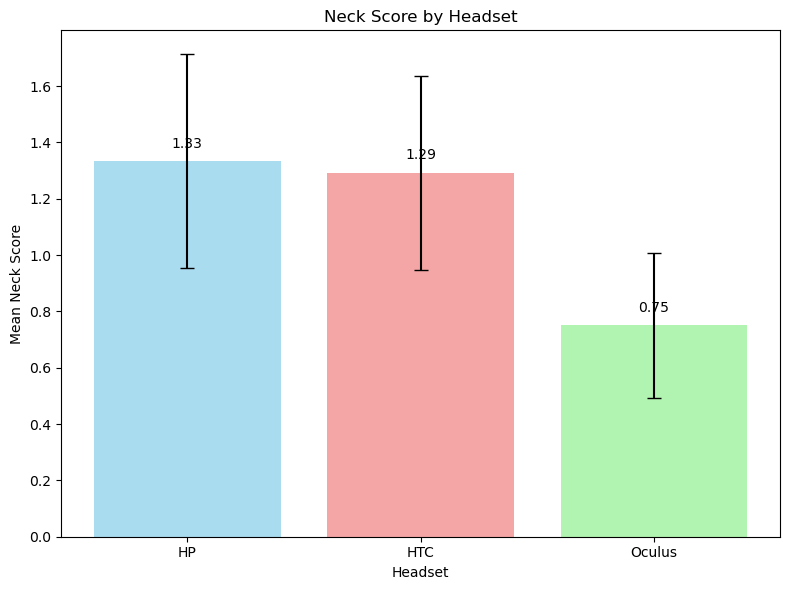

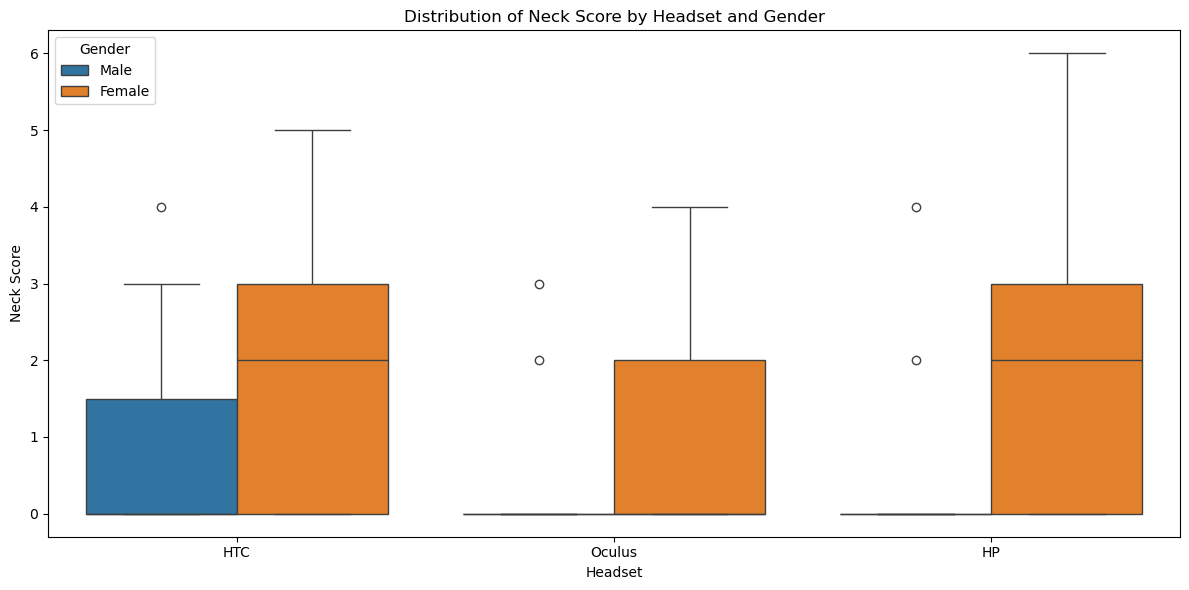

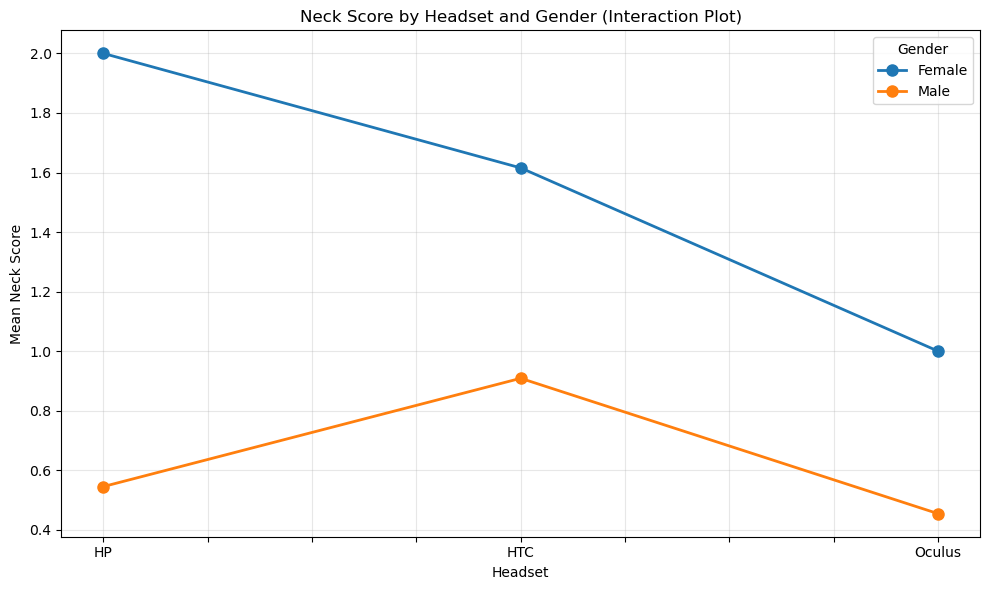

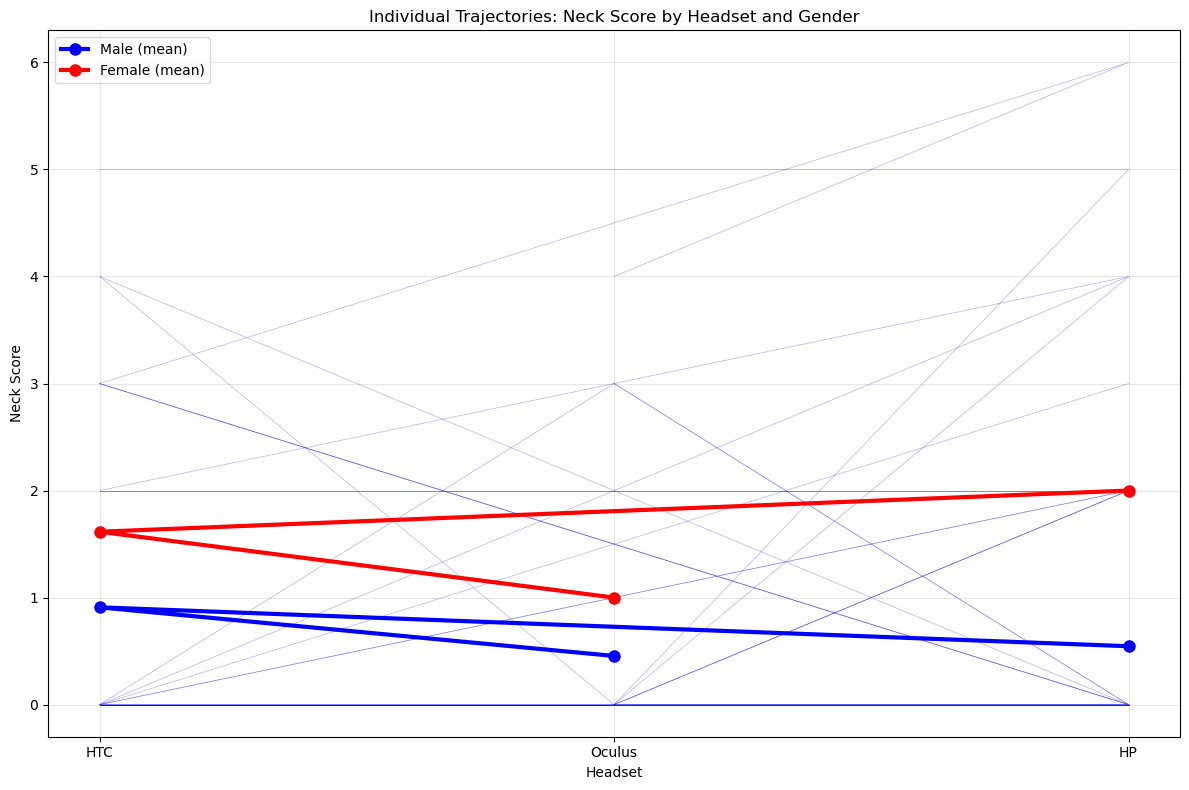


Descriptive Statistics for Neck Score:
                count   mean    std    sem  min  max
HeadSet Gender                                      
HP      Female     13  2.000  2.041  0.566    0    6
        Male       11  0.545  1.293  0.390    0    4
HTC     Female     13  1.615  1.758  0.488    0    5
        Male       11  0.909  1.578  0.476    0    4
Oculus  Female     13  1.000  1.414  0.392    0    4
        Male       11  0.455  1.036  0.312    0    3


==================== UPPER BACK SCORE ANALYSIS ====================

Data summary for Upper Back Score:
Participants: 24
Observations: 72
Mean Upper Back Score: 0.611
SD Upper Back Score: 1.400
Range: 0.0 - 6.0

Data distribution by HeadSet:
HeadSet
HP        24
HTC       24
Oculus    24
dtype: int64

Data distribution by Gender:
Gender
Female    13
Male      11
Name: UniqueID, dtype: int64

Participants with all headset conditions: 24
Total participants: 24

--- Mixed ANOVA Results for Upper Back Score ---
        Source       

C:\Users\ITXPC\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


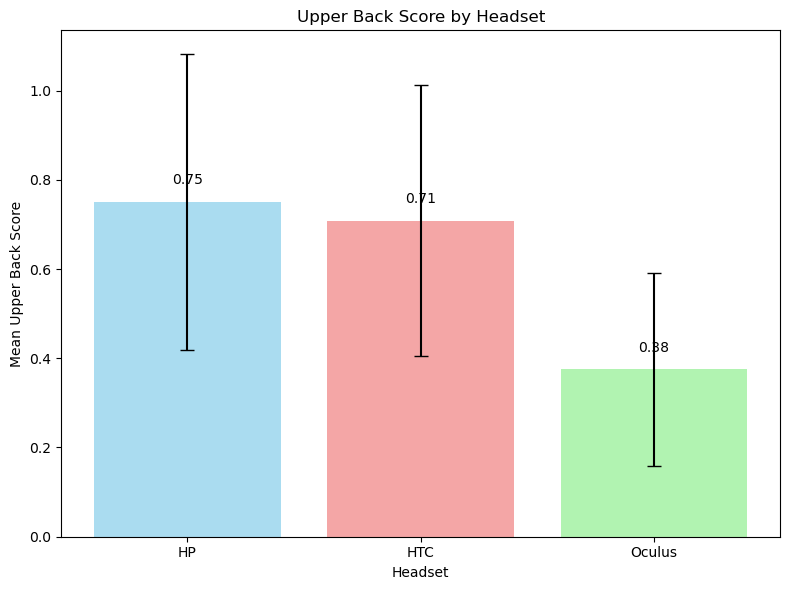

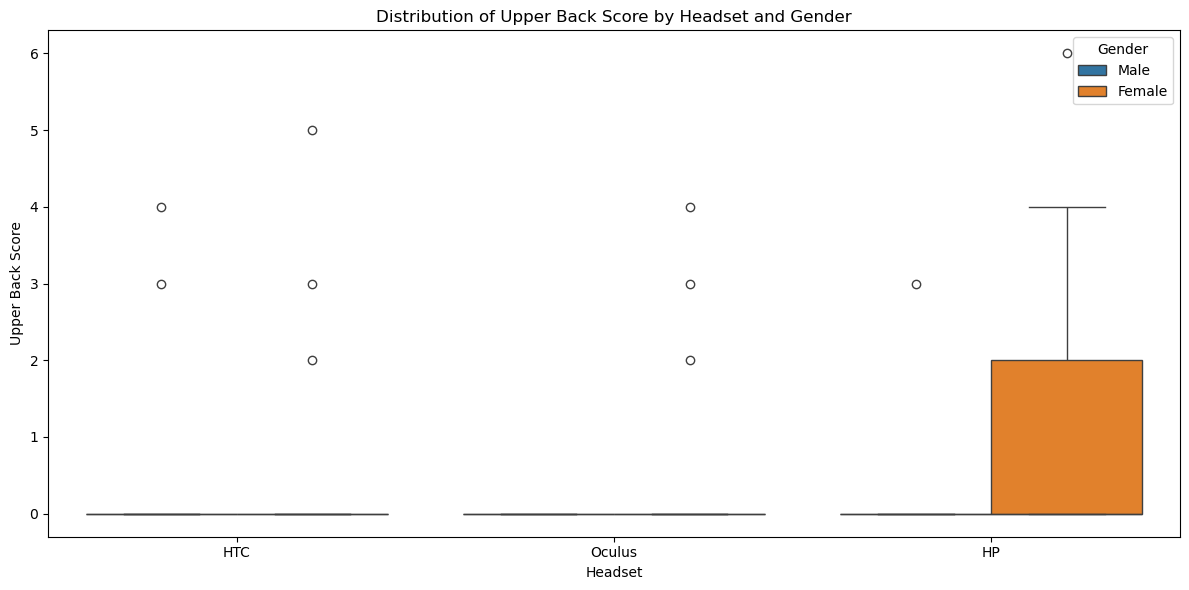

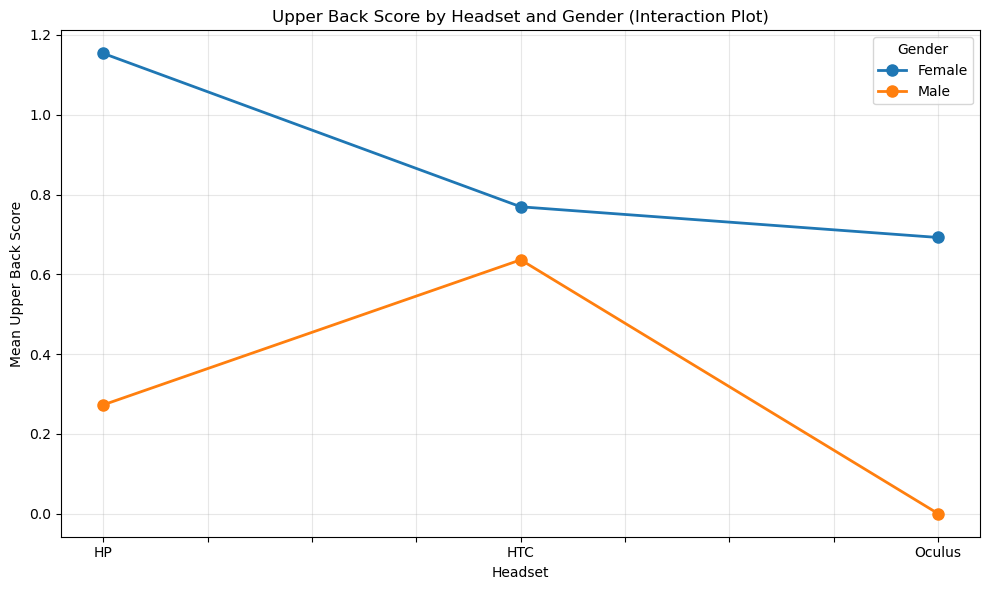

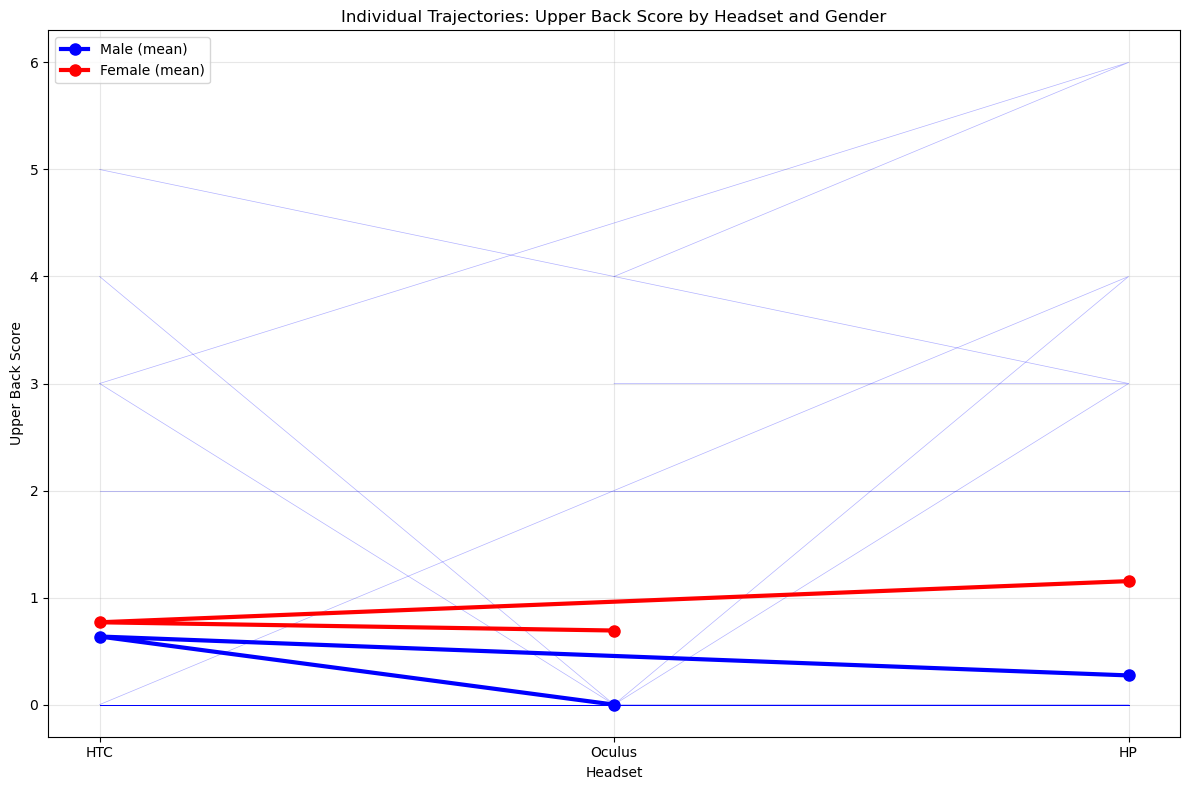


Descriptive Statistics for Upper Back Score:
                count   mean    std    sem  min  max
HeadSet Gender                                      
HP      Female     13  1.154  1.994  0.553    0    6
        Male       11  0.273  0.905  0.273    0    3
HTC     Female     13  0.769  1.589  0.441    0    5
        Male       11  0.636  1.433  0.432    0    4
Oculus  Female     13  0.692  1.377  0.382    0    4
        Male       11  0.000  0.000  0.000    0    0


COMPARATIVE SUMMARY OF RESULTS
Statistical Summary:
              Score  HeadSet_F  HeadSet_p HeadSet_sig  Gender_F  Gender_p  \
0        Neck Score     1.4693     0.2411          No    3.6645    0.0687   
1  Upper Back Score     1.5471     0.2242          No    1.2638    0.2731   

  Gender_sig  
0         No  
1         No  

CONCLUSIONS
This analysis used repeated measures ANOVA (RMANOVA) with pingouin to:
• Test for main effects of HeadSet (within-subjects factor)
• Test for main effects of Gender (between-subjects fac

In [10]:
import pandas as pd
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

# Data overview
print("Data overview:")
print(f"Total observations: {len(df)}")
print(f"Unique participants: {df['UniqueID'].nunique()}")
print(f"Headsets: {df['HeadSet'].unique()}")
print(f"Gender distribution:\n{df['Gender'].value_counts()}")
print(f"Observations per participant:\n{df.groupby('UniqueID').size().value_counts()}")

# Check for missing values in our variables of interest
print(f"\nMissing values in Neck Score: {df['Neck Score'].isna().sum()}")
print(f"Missing values in Upper Back Score: {df['Upper Back Score'].isna().sum()}")
print(f"Missing values in Gender: {df['Gender'].isna().sum()}")
print(f"Missing values in HeadSet: {df['HeadSet'].isna().sum()}")
print(f"Missing values in UniqueID: {df['UniqueID'].isna().sum()}")

# Clean data
df_clean = df.dropna(subset=['Neck Score', 'Upper Back Score', 'UniqueID', 'HeadSet', 'Gender'])

# Clean categorical variables
df_clean['HeadSet'] = df_clean['HeadSet'].str.strip()
df_clean['Gender'] = df_clean['Gender'].str.strip()

print(f"\nData after removing missing values: {len(df_clean)} observations")
print(f"Participants after cleaning: {df_clean['UniqueID'].nunique()}")

# Descriptive statistics by headset and gender
print("\nDescriptive Statistics by HeadSet and Gender:")
print("Neck Score:")
neck_desc = df_clean.groupby(['HeadSet', 'Gender'])['Neck Score'].agg(['count', 'mean', 'std', 'sem']).round(3)
print(neck_desc)

print("\nUpper Back Score:")
back_desc = df_clean.groupby(['HeadSet', 'Gender'])['Upper Back Score'].agg(['count', 'mean', 'std', 'sem']).round(3)
print(back_desc)

# ============================================================================
# RMANOVA ANALYSIS WITH PINGOUIN
# ============================================================================

def analyze_score_pingouin(score_name, df_data):
    """Comprehensive RMANOVA analysis for a given score"""
    print(f"\n{'='*20} {score_name.upper()} ANALYSIS {'='*20}")
    
    # Clean data for this score
    score_data = df_data.dropna(subset=[score_name, 'HeadSet', 'Gender', 'UniqueID'])
    
    if len(score_data) == 0:
        print(f"No valid data for {score_name}")
        return None
    
    print(f"\nData summary for {score_name}:")
    print(f"Participants: {score_data['UniqueID'].nunique()}")
    print(f"Observations: {len(score_data)}")
    print(f"Mean {score_name}: {score_data[score_name].mean():.3f}")
    print(f"SD {score_name}: {score_data[score_name].std():.3f}")
    print(f"Range: {score_data[score_name].min():.1f} - {score_data[score_name].max():.1f}")
    
    # Check data distribution
    print(f"\nData distribution by HeadSet:")
    headset_counts = score_data.groupby(['HeadSet', 'UniqueID']).size().groupby('HeadSet').count()
    print(headset_counts)
    
    print(f"\nData distribution by Gender:")
    gender_counts = score_data.groupby('Gender')['UniqueID'].nunique()
    print(gender_counts)
    
    # Check if we have enough data for mixed ANOVA
    headset_per_participant = score_data.groupby('UniqueID')['HeadSet'].nunique()
    participants_with_all_headsets = (headset_per_participant == score_data['HeadSet'].nunique()).sum()
    
    print(f"\nParticipants with all headset conditions: {participants_with_all_headsets}")
    print(f"Total participants: {score_data['UniqueID'].nunique()}")
    
    # Mixed ANOVA (HeadSet within, Gender between)
    results = {}
    
    try:
        print(f"\n--- Mixed ANOVA Results for {score_name} ---")
        anova_result = pg.mixed_anova(
            data=score_data,
            dv=score_name,
            within='HeadSet',
            between='Gender',
            subject='UniqueID'
        )
        print(anova_result)
        results['mixed_anova'] = anova_result
        
        # Extract effect sizes
        print(f"\nEffect Sizes:")
        for idx, row in anova_result.iterrows():
            source = row['Source']
            if 'np2' in anova_result.columns:
                effect_size = row['np2']
                print(f"  {source}: η²p = {effect_size:.3f}")
        
        # Post-hoc analyses
        print(f"\n--- Post-hoc Analyses for {score_name} ---")
        
        # Main effect of HeadSet
        headset_mask = anova_result['Source'] == 'HeadSet'
        if headset_mask.any():
            headset_p = anova_result.loc[headset_mask, 'p-unc'].iloc[0]
            headset_f = anova_result.loc[headset_mask, 'F'].iloc[0]
            print(f"\nHeadSet main effect: F = {headset_f:.3f}, p = {headset_p:.4f}")
            
            if headset_p < 0.05:
                print("Significant main effect of HeadSet - performing pairwise comparisons:")
                pairwise_headset = pg.pairwise_tests(
                    data=score_data,
                    dv=score_name,
                    within='HeadSet',
                    subject='UniqueID',
                    padjust='bonferroni'
                )
                print(pairwise_headset[['A', 'B', 'T', 'p-unc', 'p-corr', 'hedges']])
                results['pairwise_headset'] = pairwise_headset
            else:
                print("No significant main effect of HeadSet")
        
        # Main effect of Gender
        gender_mask = anova_result['Source'] == 'Gender'
        if gender_mask.any():
            gender_p = anova_result.loc[gender_mask, 'p-unc'].iloc[0]
            gender_f = anova_result.loc[gender_mask, 'F'].iloc[0]
            print(f"\nGender main effect: F = {gender_f:.3f}, p = {gender_p:.4f}")
            
            if gender_p < 0.05:
                print("Significant main effect of Gender:")
                gender_means = score_data.groupby('Gender')[score_name].agg(['mean', 'std', 'sem', 'count'])
                print(gender_means.round(3))
                
                # Effect size for gender difference
                if len(score_data['Gender'].unique()) == 2:
                    genders = score_data['Gender'].unique()
                    group1 = score_data[score_data['Gender'] == genders[0]][score_name]
                    group2 = score_data[score_data['Gender'] == genders[1]][score_name]
                    cohen_d = pg.compute_effsize(group1, group2, eftype='cohen')
                    print(f"Cohen's d for gender difference: {cohen_d:.3f}")
            else:
                print("No significant main effect of Gender")
        
        # Interaction effect
        interaction_names = ['HeadSet * Gender', 'Gender * HeadSet', 'HeadSet:Gender']
        interaction_p = None
        interaction_f = None
        
        for name in interaction_names:
            interaction_mask = anova_result['Source'] == name
            if interaction_mask.any():
                interaction_p = anova_result.loc[interaction_mask, 'p-unc'].iloc[0]
                interaction_f = anova_result.loc[interaction_mask, 'F'].iloc[0]
                print(f"\nHeadSet × Gender interaction: F = {interaction_f:.3f}, p = {interaction_p:.4f}")
                break
        
        if interaction_p is not None and interaction_p < 0.05:
            print("Significant interaction - performing simple effects analysis:")
            
            # Simple effects: HeadSet effect within each gender
            for gender in score_data['Gender'].unique():
                gender_subset = score_data[score_data['Gender'] == gender]
                if gender_subset['UniqueID'].nunique() > 1:
                    try:
                        simple_effect = pg.rm_anova(
                            data=gender_subset,
                            dv=score_name,
                            within='HeadSet',
                            subject='UniqueID'
                        )
                        se_p = simple_effect['p-unc'].iloc[0]
                        se_f = simple_effect['F'].iloc[0]
                        print(f"  HeadSet effect for {gender}: F = {se_f:.3f}, p = {se_p:.4f}")
                        
                        if se_p < 0.05:
                            pairwise_simple = pg.pairwise_tests(
                                data=gender_subset,
                                dv=score_name,
                                within='HeadSet',
                                subject='UniqueID',
                                padjust='bonferroni'
                            )
                            print(f"  Pairwise comparisons for {gender}:")
                            print(pairwise_simple[['A', 'B', 'T', 'p-unc', 'p-corr', 'hedges']])
                    except Exception as e:
                        print(f"  Could not analyze simple effects for {gender}: {e}")
        elif interaction_p is not None:
            print("No significant HeadSet × Gender interaction")
        
    except Exception as e:
        print(f"Error running mixed ANOVA for {score_name}: {e}")
        print("Attempting repeated measures ANOVA without between-subjects factor...")
        
        # Fallback to simple repeated measures ANOVA
        try:
            rm_anova_result = pg.rm_anova(
                data=score_data,
                dv=score_name,
                within='HeadSet',
                subject='UniqueID'
            )
            print(f"\nRepeated Measures ANOVA Results for {score_name}:")
            print(rm_anova_result)
            results['rm_anova'] = rm_anova_result
            
            rm_p = rm_anova_result['p-unc'].iloc[0]
            rm_f = rm_anova_result['F'].iloc[0]
            print(f"HeadSet effect: F = {rm_f:.3f}, p = {rm_p:.4f}")
            
            if rm_p < 0.05:
                print("Significant effect of HeadSet - performing pairwise comparisons:")
                pairwise_rm = pg.pairwise_tests(
                    data=score_data,
                    dv=score_name,
                    within='HeadSet',
                    subject='UniqueID',
                    padjust='bonferroni'
                )
                print(pairwise_rm[['A', 'B', 'T', 'p-unc', 'p-corr', 'hedges']])
                results['pairwise_rm'] = pairwise_rm
        
        except Exception as e2:
            print(f"Error running repeated measures ANOVA: {e2}")
    
    # Assumption checks
    print(f"\n--- Assumption Checks for {score_name} ---")
    
    # Sphericity test (for within-subjects factor)
    try:
        sphericity = pg.sphericity(data=score_data, dv=score_name, within='HeadSet', subject='UniqueID')
        print(f"Sphericity test: W = {sphericity['W'].iloc[0]:.4f}, p = {sphericity['pval'].iloc[0]:.4f}")
        sphericity_violated = sphericity['pval'].iloc[0] < 0.05
        print(f"Sphericity assumption {'violated' if sphericity_violated else 'met'}")
        
        if sphericity_violated:
            print("Consider using Greenhouse-Geisser or Huynh-Feldt corrections")
        
        results['sphericity'] = sphericity
    except Exception as e:
        print(f"Could not perform sphericity test: {e}")
    
    # Normality tests by condition
    print(f"\nNormality tests by HeadSet and Gender:")
    for headset in score_data['HeadSet'].unique():
        for gender in score_data['Gender'].unique():
            subset = score_data[(score_data['HeadSet'] == headset) & 
                               (score_data['Gender'] == gender)]
            if len(subset) >= 3:
                try:
                    normality = pg.normality(subset[score_name])
                    w_stat = normality['W'].iloc[0]
                    p_val = normality['pval'].iloc[0]
                    print(f"  {headset} - {gender}: W = {w_stat:.4f}, p = {p_val:.4f}")
                except Exception as e:
                    print(f"  {headset} - {gender}: Could not test normality - {e}")
    
    # Homogeneity of variance (Levene's test)
    try:
        print(f"\nHomogeneity of variance tests:")
        # Test by HeadSet
        levene_headset = pg.homoscedasticity(data=score_data, dv=score_name, group='HeadSet')
        print(f"Levene's test by HeadSet: {levene_headset}")
        
        # Test by Gender
        levene_gender = pg.homoscedasticity(data=score_data, dv=score_name, group='Gender')
        print(f"Levene's test by Gender: {levene_gender}")
        
    except Exception as e:
        print(f"Could not perform homogeneity tests: {e}")
    
    # Visualizations
    print(f"\n--- Creating Visualizations for {score_name} ---")
    
    # Plot 1: Bar plot by headset
    try:
        means = score_data.groupby('HeadSet')[score_name].mean()
        sems = score_data.groupby('HeadSet')[score_name].sem()
        
        fig, ax = plt.subplots(figsize=(8, 6))
        bars = ax.bar(means.index, means.values, yerr=sems.values, 
                      capsize=5, alpha=0.7, color=['skyblue', 'lightcoral', 'lightgreen'])
        ax.set_title(f'{score_name} by Headset')
        ax.set_ylabel(f'Mean {score_name}')
        ax.set_xlabel('Headset')
        
        # Add value labels
        for bar, mean_val in zip(bars, means.values):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(sems.values)*0.1, 
                    f'{mean_val:.2f}', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not create bar plot: {e}")
    
    # Plot 2: Box plot by headset and gender
    try:
        fig, ax = plt.subplots(figsize=(12, 6))
        sns.boxplot(data=score_data, x='HeadSet', y=score_name, hue='Gender', ax=ax)
        ax.set_title(f'Distribution of {score_name} by Headset and Gender')
        ax.set_ylabel(score_name)
        ax.set_xlabel('Headset')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not create box plot: {e}")
    
    # Plot 3: Interaction plot
    try:
        pivot = score_data.groupby(['HeadSet', 'Gender'])[score_name].mean().unstack()
        if not pivot.empty and pivot.shape[1] > 1:
            fig, ax = plt.subplots(figsize=(10, 6))
            pivot.plot(kind='line', marker='o', linewidth=2, markersize=8, ax=ax)
            ax.set_title(f'{score_name} by Headset and Gender (Interaction Plot)')
            ax.set_ylabel(f'Mean {score_name}')
            ax.set_xlabel('Headset')
            ax.legend(title='Gender')
            ax.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
    except Exception as e:
        print(f"Could not create interaction plot: {e}")
    
    # Plot 4: Individual trajectories (spaghetti plot)
    try:
        fig, ax = plt.subplots(figsize=(12, 8))
        
        # Plot by gender
        for gender in score_data['Gender'].unique():
            gender_data = score_data[score_data['Gender'] == gender]
            
            # Plot individual participant lines
            for participant in gender_data['UniqueID'].unique():
                participant_data = gender_data[gender_data['UniqueID'] == participant]
                if len(participant_data) > 1:  # Only plot if participant has multiple observations
                    ax.plot(participant_data['HeadSet'], participant_data[score_name], 
                           alpha=0.3, linewidth=0.5, 
                           color='blue' if gender == gender_data['Gender'].iloc[0] else 'red')
            
            # Plot mean line
            mean_data = gender_data.groupby('HeadSet')[score_name].mean()
            ax.plot(mean_data.index, mean_data.values, 
                   marker='o', linewidth=3, markersize=8, 
                   label=f'{gender} (mean)', 
                   color='blue' if gender == score_data['Gender'].unique()[0] else 'red')
        
        ax.set_title(f'Individual Trajectories: {score_name} by Headset and Gender')
        ax.set_ylabel(score_name)
        ax.set_xlabel('Headset')
        ax.legend()
        ax.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not create trajectory plot: {e}")
    
    # Summary statistics table
    print(f"\nDescriptive Statistics for {score_name}:")
    try:
        summary_stats = score_data.groupby(['HeadSet', 'Gender'])[score_name].agg([
            'count', 'mean', 'std', 'sem', 'min', 'max'
        ]).round(3)
        print(summary_stats)
    except Exception as e:
        print(f"Could not generate summary statistics: {e}")
    
    print(f"\n{'='*60}")
    return results

# ============================================================================
# RUN ANALYSES FOR BOTH SCORES
# ============================================================================

print("="*80)
print("NECK AND BACK PAIN ANALYSIS WITH PINGOUIN RMANOVA")
print("="*80)

# Analyze Neck Score
neck_results = analyze_score_pingouin('Neck Score', df_clean)

# Analyze Upper Back Score  
back_results = analyze_score_pingouin('Upper Back Score', df_clean)

# ============================================================================
# COMPARATIVE SUMMARY
# ============================================================================

print("\n" + "="*80)
print("COMPARATIVE SUMMARY OF RESULTS")
print("="*80)

def extract_main_results(results, score_name):
    """Extract key statistical results for summary"""
    summary = {'Score': score_name}
    
    if results and 'mixed_anova' in results:
        anova_result = results['mixed_anova']
        
        # HeadSet effect
        headset_mask = anova_result['Source'] == 'HeadSet'
        if headset_mask.any():
            summary['HeadSet_F'] = anova_result.loc[headset_mask, 'F'].iloc[0]
            summary['HeadSet_p'] = anova_result.loc[headset_mask, 'p-unc'].iloc[0]
            summary['HeadSet_sig'] = 'Yes' if summary['HeadSet_p'] < 0.05 else 'No'
        
        # Gender effect
        gender_mask = anova_result['Source'] == 'Gender'
        if gender_mask.any():
            summary['Gender_F'] = anova_result.loc[gender_mask, 'F'].iloc[0]
            summary['Gender_p'] = anova_result.loc[gender_mask, 'p-unc'].iloc[0]
            summary['Gender_sig'] = 'Yes' if summary['Gender_p'] < 0.05 else 'No'
        
        # Interaction effect
        interaction_names = ['HeadSet * Gender', 'Gender * HeadSet', 'HeadSet:Gender']
        for name in interaction_names:
            interaction_mask = anova_result['Source'] == name
            if interaction_mask.any():
                summary['Interaction_F'] = anova_result.loc[interaction_mask, 'F'].iloc[0]
                summary['Interaction_p'] = anova_result.loc[interaction_mask, 'p-unc'].iloc[0]
                summary['Interaction_sig'] = 'Yes' if summary['Interaction_p'] < 0.05 else 'No'
                break
    
    return summary

# Create summary table
if neck_results and back_results:
    neck_summary = extract_main_results(neck_results, 'Neck Score')
    back_summary = extract_main_results(back_results, 'Upper Back Score')
    
    summary_df = pd.DataFrame([neck_summary, back_summary])
    
    print("Statistical Summary:")
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    print(summary_df.round(4))

# Overall conclusions
print(f"\n{'='*60}")
print("CONCLUSIONS")
print(f"{'='*60}")

print("This analysis used repeated measures ANOVA (RMANOVA) with pingouin to:")
print("• Test for main effects of HeadSet (within-subjects factor)")
print("• Test for main effects of Gender (between-subjects factor)")  
print("• Test for HeadSet × Gender interactions")
print("• Perform appropriate post-hoc comparisons with multiple comparison corrections")
print("• Check statistical assumptions (sphericity, normality, homogeneity)")
print("• Provide comprehensive visualizations")
print("\nRMANOVA properly accounts for the correlation between repeated")
print("measurements from the same participants, providing more appropriate")
print("statistical inference than traditional between-subjects ANOVA.")
print(f"{'='*60}")

Data overview:
Total observations: 72
Unique participants: 24
Headsets: ['HTC' 'Oculus' 'HP']
Gender distribution: Gender
Female    39
Male      33
Name: count, dtype: int64
Observations per participant: 3    24
Name: count, dtype: int64

Missing values in Neck Score: 0
Missing values in Upper Back Score: 0
Missing values in Gender: 0

Data after removing missing values: 72 observations

Descriptive Statistics by HeadSet and Gender:
Neck Score:
                count   mean    std
HeadSet Gender                     
HP      Female     13  2.000  2.041
        Male       11  0.545  1.293
HTC     Female     13  1.615  1.758
        Male       11  0.909  1.578
Oculus  Female     13  1.000  1.414
        Male       11  0.455  1.036

Upper Back Score:
                count   mean    std
HeadSet Gender                     
HP      Female     13  1.154  1.994
        Male       11  0.273  0.905
HTC     Female     13  0.769  1.589
        Male       11  0.636  1.433
Oculus  Female     13  0.692

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:

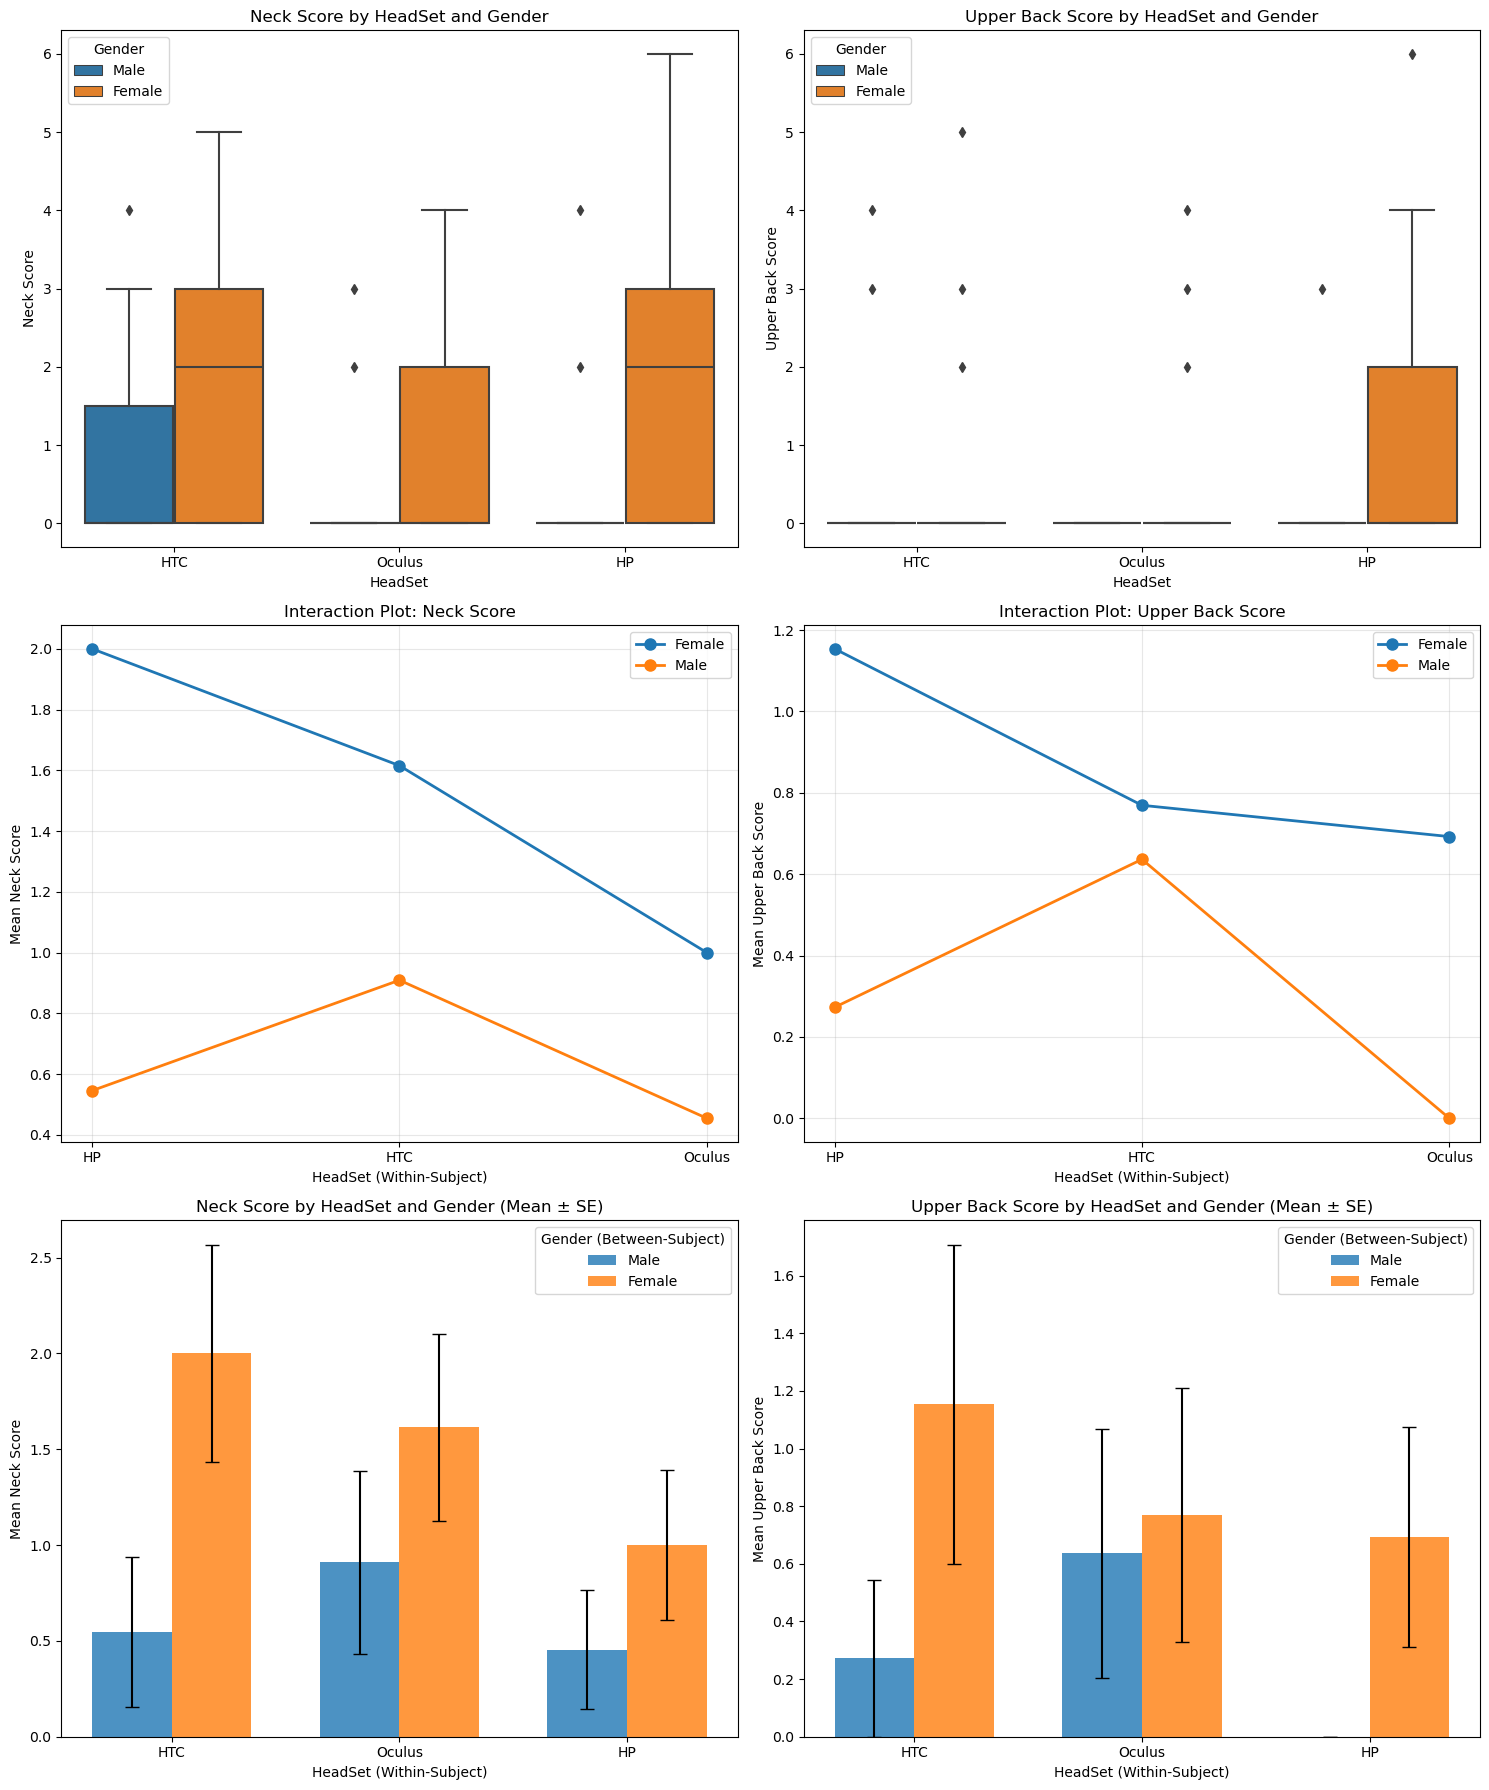


FINAL SUMMARY TABLE - MIXED ANOVA RESULTS


KeyError: 'ddof1'

In [40]:
import pandas as pd
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

# First, let's examine the data structure including gender
print("Data overview:")
print(f"Total observations: {len(df)}")
print(f"Unique participants: {df['UniqueID'].nunique()}")
print(f"Headsets: {df['HeadSet'].unique()}")
print(f"Gender distribution: {df['Gender'].value_counts()}")
print(f"Observations per participant: {df.groupby('UniqueID').size().value_counts()}")

# Check for missing values in our variables of interest
print(f"\nMissing values in Neck Score: {df['Neck Score'].isna().sum()}")
print(f"Missing values in Upper Back Score: {df['Upper Back Score'].isna().sum()}")
print(f"Missing values in Gender: {df['Gender'].isna().sum()}")

# Remove any rows with missing values in the variables we're analyzing
df_clean = df.dropna(subset=['Neck Score', 'Upper Back Score', 'UniqueID', 'HeadSet', 'Gender'])

print(f"\nData after removing missing values: {len(df_clean)} observations")

# Descriptive statistics by headset and gender
print("\nDescriptive Statistics by HeadSet and Gender:")
print("Neck Score:")
print(df_clean.groupby(['HeadSet', 'Gender'])['Neck Score'].agg(['count', 'mean', 'std']).round(3))
print("\nUpper Back Score:")
print(df_clean.groupby(['HeadSet', 'Gender'])['Upper Back Score'].agg(['count', 'mean', 'std']).round(3))

# ============================================================================
# MIXED ANOVA ANALYSIS USING PINGOUIN
# HeadSet = Within-subject factor (repeated measures)
# Gender = Between-subject factor
# ============================================================================

print("\n" + "="*70)
print("MIXED ANOVA ANALYSIS USING PINGOUIN")
print("HeadSet: Within-subject factor (repeated measures)")
print("Gender: Between-subject factor")
print("="*70)

# Analysis 1: Neck Score Mixed ANOVA
print("\n1. MIXED ANOVA FOR NECK SCORE")
print("-" * 40)

try:
    neck_mixed_anova = pg.mixed_anova(
        data=df_clean,
        dv='Neck Score',           # Dependent variable
        within='HeadSet',          # Within-subject factor
        between='Gender',          # Between-subject factor
        subject='UniqueID'         # Subject identifier
    )
    
    print("Mixed ANOVA Results for Neck Score:")
    print(neck_mixed_anova.round(4))
    
    # Extract key results
    neck_results = {}
    for effect in neck_mixed_anova['Source']:
        row = neck_mixed_anova[neck_mixed_anova['Source'] == effect].iloc[0]
        neck_results[effect] = {
            'F': row['F'],
            'p-unc': row['p-unc'],
            'p-GG-corr': row.get('p-GG-corr', None),  # Greenhouse-Geisser correction if available
            'significant': row['p-unc'] < 0.05
        }
    
    print(f"\nDetailed Results for Neck Score:")
    for effect, stats in neck_results.items():
        print(f"{effect}:")
        print(f"  F-statistic: {stats['F']:.3f}")
        print(f"  p-value (uncorrected): {stats['p-unc']:.4f}")
        if stats['p-GG-corr'] is not None:
            print(f"  p-value (Greenhouse-Geisser): {stats['p-GG-corr']:.4f}")
        print(f"  Significant: {'Yes' if stats['significant'] else 'No'}")
        print()
    
except Exception as e:
    print(f"Error running Mixed ANOVA for Neck Score: {e}")
    neck_mixed_anova = None

# Analysis 2: Upper Back Score Mixed ANOVA
print("\n2. MIXED ANOVA FOR UPPER BACK SCORE")
print("-" * 40)

try:
    back_mixed_anova = pg.mixed_anova(
        data=df_clean,
        dv='Upper Back Score',     # Dependent variable
        within='HeadSet',          # Within-subject factor
        between='Gender',          # Between-subject factor
        subject='UniqueID'         # Subject identifier
    )
    
    print("Mixed ANOVA Results for Upper Back Score:")
    print(back_mixed_anova.round(4))
    
    # Extract key results
    back_results = {}
    for effect in back_mixed_anova['Source']:
        row = back_mixed_anova[back_mixed_anova['Source'] == effect].iloc[0]
        back_results[effect] = {
            'F': row['F'],
            'p-unc': row['p-unc'],
            'p-GG-corr': row.get('p-GG-corr', None),
            'significant': row['p-unc'] < 0.05
        }
    
    print(f"\nDetailed Results for Upper Back Score:")
    for effect, stats in back_results.items():
        print(f"{effect}:")
        print(f"  F-statistic: {stats['F']:.3f}")
        print(f"  p-value (uncorrected): {stats['p-unc']:.4f}")
        if stats['p-GG-corr'] is not None:
            print(f"  p-value (Greenhouse-Geisser): {stats['p-GG-corr']:.4f}")
        print(f"  Significant: {'Yes' if stats['significant'] else 'No'}")
        print()
    
except Exception as e:
    print(f"Error running Mixed ANOVA for Upper Back Score: {e}")
    back_mixed_anova = None

# ============================================================================
# ASSUMPTION TESTING
# ============================================================================

print("\n" + "="*60)
print("ASSUMPTION TESTING")
print("="*60)

# Test sphericity (for within-subject factor)
print("1. SPHERICITY TESTING (for within-subject factor: HeadSet)")
print("-" * 50)

try:
    # Test sphericity for Neck Score
    neck_sphericity = pg.sphericity(
        data=df_clean, 
        dv='Neck Score', 
        within='HeadSet', 
        subject='UniqueID'
    )
    print("Sphericity Test for Neck Score:")
    print(neck_sphericity.round(4))
    
    # Test sphericity for Upper Back Score
    back_sphericity = pg.sphericity(
        data=df_clean, 
        dv='Upper Back Score', 
        within='HeadSet', 
        subject='UniqueID'
    )
    print("\nSphericity Test for Upper Back Score:")
    print(back_sphericity.round(4))
    
except Exception as e:
    print(f"Error testing sphericity: {e}")

# Test normality
print(f"\n2. NORMALITY TESTING")
print("-" * 30)

try:
    # Test normality for each group combination
    for outcome in ['Neck Score', 'Upper Back Score']:
        print(f"\nNormality tests for {outcome}:")
        for headset in df_clean['HeadSet'].unique():
            for gender in df_clean['Gender'].unique():
                subset = df_clean[(df_clean['HeadSet'] == headset) & (df_clean['Gender'] == gender)]
                if len(subset) > 3:  # Need at least 4 observations for normality test
                    normality = pg.normality(subset[outcome])
                    print(f"  {headset} - {gender}: Shapiro p = {normality['pval'].iloc[0]:.4f}")
    
except Exception as e:
    print(f"Error testing normality: {e}")

# ============================================================================
# POST-HOC ANALYSIS
# ============================================================================

print("\n" + "="*60)
print("POST-HOC ANALYSIS")
print("="*60)

# Determine which effects need post-hoc testing
significant_effects = []

if neck_mixed_anova is not None:
    for effect in neck_results:
        if neck_results[effect]['significant'] and effect in ['HeadSet', 'Gender', 'HeadSet * Gender']:
            significant_effects.append(('Neck Score', effect))

if back_mixed_anova is not None:
    for effect in back_results:
        if back_results[effect]['significant'] and effect in ['HeadSet', 'Gender', 'HeadSet * Gender']:
            significant_effects.append(('Upper Back Score', effect))

if significant_effects:
    print("Performing post-hoc tests for significant effects:")
    
    for outcome, effect in significant_effects:
        print(f"\nPost-hoc analysis for {outcome} - {effect}:")
        print("-" * 40)
        
        try:
            if effect == 'HeadSet':
                # Pairwise comparisons within HeadSet (within-subject)
                posthoc = pg.pairwise_tests(
                    data=df_clean,
                    dv=outcome,
                    within='HeadSet',
                    subject='UniqueID',
                    padjust='bonf'  # Bonferroni correction
                )
                print(posthoc[['A', 'B', 'T', 'p-unc', 'p-corr']].round(4))
                
            elif effect == 'Gender':
                # Pairwise comparisons between Gender (between-subject)
                posthoc = pg.pairwise_tests(
                    data=df_clean,
                    dv=outcome,
                    between='Gender',
                    padjust='bonf'
                )
                print(posthoc[['A', 'B', 'T', 'p-unc', 'p-corr']].round(4))
                
            elif effect == 'HeadSet * Gender':
                # Simple effects analysis for interaction
                print("Simple effects analysis:")
                
                # Effect of HeadSet at each level of Gender
                for gender in df_clean['Gender'].unique():
                    subset = df_clean[df_clean['Gender'] == gender]
                    if len(subset) > 0:
                        simple_effect = pg.pairwise_tests(
                            data=subset,
                            dv=outcome,
                            within='HeadSet',
                            subject='UniqueID',
                            padjust='bonf'
                        )
                        print(f"\nHeadSet effect within {gender}:")
                        print(simple_effect[['A', 'B', 'T', 'p-unc', 'p-corr']].round(4))
                
        except Exception as e:
            print(f"Error in post-hoc analysis for {outcome} - {effect}: {e}")
else:
    print("No significant effects found requiring post-hoc analysis.")

# ============================================================================
# EFFECT SIZES
# ============================================================================

print("\n" + "="*60)
print("EFFECT SIZES")
print("="*60)

try:
    # Calculate effect sizes using eta-squared
    if neck_mixed_anova is not None:
        print("Effect sizes for Neck Score (η²):")
        for _, row in neck_mixed_anova.iterrows():
            if row['Source'] in ['HeadSet', 'Gender', 'HeadSet * Gender']:
                eta_squared = row['SS'] / neck_mixed_anova['SS'].sum()
                print(f"  {row['Source']}: η² = {eta_squared:.4f}")
    
    if back_mixed_anova is not None:
        print("\nEffect sizes for Upper Back Score (η²):")
        for _, row in back_mixed_anova.iterrows():
            if row['Source'] in ['HeadSet', 'Gender', 'HeadSet * Gender']:
                eta_squared = row['SS'] / back_mixed_anova['SS'].sum()
                print(f"  {row['Source']}: η² = {eta_squared:.4f}")
    
except Exception as e:
    print(f"Error calculating effect sizes: {e}")

# ============================================================================
# VISUALIZATION
# ============================================================================

print("\n" + "="*60)
print("DATA VISUALIZATION")
print("="*60)

# Create comprehensive visualizations
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Box plots for Neck Score by HeadSet and Gender
sns.boxplot(data=df_clean, x='HeadSet', y='Neck Score', hue='Gender', ax=axes[0,0])
axes[0,0].set_title('Neck Score by HeadSet and Gender')
axes[0,0].set_ylabel('Neck Score')

# Box plots for Upper Back Score by HeadSet and Gender
sns.boxplot(data=df_clean, x='HeadSet', y='Upper Back Score', hue='Gender', ax=axes[0,1])
axes[0,1].set_title('Upper Back Score by HeadSet and Gender')
axes[0,1].set_ylabel('Upper Back Score')

# Interaction plots
# Neck Score interaction plot
neck_means = df_clean.groupby(['HeadSet', 'Gender'])['Neck Score'].mean().reset_index()
for gender in neck_means['Gender'].unique():
    gender_data = neck_means[neck_means['Gender'] == gender]
    axes[1,0].plot(gender_data['HeadSet'], gender_data['Neck Score'], 
                   marker='o', label=f'{gender}', linewidth=2, markersize=8)
axes[1,0].set_title('Interaction Plot: Neck Score')
axes[1,0].set_ylabel('Mean Neck Score')
axes[1,0].set_xlabel('HeadSet (Within-Subject)')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Upper Back Score interaction plot
back_means = df_clean.groupby(['HeadSet', 'Gender'])['Upper Back Score'].mean().reset_index()
for gender in back_means['Gender'].unique():
    gender_data = back_means[back_means['Gender'] == gender]
    axes[1,1].plot(gender_data['HeadSet'], gender_data['Upper Back Score'], 
                   marker='o', label=f'{gender}', linewidth=2, markersize=8)
axes[1,1].set_title('Interaction Plot: Upper Back Score')
axes[1,1].set_ylabel('Mean Upper Back Score')
axes[1,1].set_xlabel('HeadSet (Within-Subject)')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# Bar plots with error bars (showing within-subject design)
neck_summary = df_clean.groupby(['HeadSet', 'Gender'])['Neck Score'].agg(['mean', 'std', 'count']).reset_index()
neck_summary['se'] = neck_summary['std'] / np.sqrt(neck_summary['count'])

x_pos = np.arange(len(df_clean['HeadSet'].unique()))
width = 0.35
genders = df_clean['Gender'].unique()

for i, gender in enumerate(genders):
    gender_data = neck_summary[neck_summary['Gender'] == gender]
    axes[2,0].bar(x_pos + i*width, gender_data['mean'], width, 
                  yerr=gender_data['se'], label=gender, alpha=0.8, capsize=5)

axes[2,0].set_title('Neck Score by HeadSet and Gender (Mean ± SE)')
axes[2,0].set_ylabel('Mean Neck Score')
axes[2,0].set_xlabel('HeadSet (Within-Subject)')
axes[2,0].set_xticks(x_pos + width/2)
axes[2,0].set_xticklabels(df_clean['HeadSet'].unique())
axes[2,0].legend(title='Gender (Between-Subject)')

# Similar for Upper Back
back_summary = df_clean.groupby(['HeadSet', 'Gender'])['Upper Back Score'].agg(['mean', 'std', 'count']).reset_index()
back_summary['se'] = back_summary['std'] / np.sqrt(back_summary['count'])

for i, gender in enumerate(genders):
    gender_data = back_summary[back_summary['Gender'] == gender]
    axes[2,1].bar(x_pos + i*width, gender_data['mean'], width, 
                  yerr=gender_data['se'], label=gender, alpha=0.8, capsize=5)

axes[2,1].set_title('Upper Back Score by HeadSet and Gender (Mean ± SE)')
axes[2,1].set_ylabel('Mean Upper Back Score')
axes[2,1].set_xlabel('HeadSet (Within-Subject)')
axes[2,1].set_xticks(x_pos + width/2)
axes[2,1].set_xticklabels(df_clean['HeadSet'].unique())
axes[2,1].legend(title='Gender (Between-Subject)')

plt.tight_layout()
plt.show()

# ============================================================================
# FINAL SUMMARY TABLE
# ============================================================================

print("\n" + "="*80)
print("FINAL SUMMARY TABLE - MIXED ANOVA RESULTS")
print("="*80)

if neck_mixed_anova is not None and back_mixed_anova is not None:
    # Combine results into summary table
    summary_data = []
    
    # Neck Score results
    for _, row in neck_mixed_anova.iterrows():
        if row['Source'] in ['HeadSet', 'Gender', 'HeadSet * Gender']:
            summary_data.append({
                'Outcome': 'Neck Score',
                'Effect': row['Source'],
                'F-statistic': row['F'],
                'df_num': row['ddof1'],
                'df_den': row['ddof2'],
                'p-value': row['p-unc'],
                'p-GG-corr': row.get('p-GG-corr', 'N/A'),
                'Significant': 'Yes' if row['p-unc'] < 0.05 else 'No'
            })
    
    # Upper Back Score results
    for _, row in back_mixed_anova.iterrows():
        if row['Source'] in ['HeadSet', 'Gender', 'HeadSet * Gender']:
            summary_data.append({
                'Outcome': 'Upper Back Score',
                'Effect': row['Source'],
                'F-statistic': row['F'],
                'df_num': row['ddof1'],
                'df_den': row['ddof2'],
                'p-value': row['p-unc'],
                'p-GG-corr': row.get('p-GG-corr', 'N/A'),
                'Significant': 'Yes' if row['p-unc'] < 0.05 else 'No'
            })
    
    summary_df = pd.DataFrame(summary_data)
    print(summary_df.round(4))

print(f"\n{'='*60}")
print("EXPERIMENTAL DESIGN SUMMARY")
print(f"{'='*60}")
print("Design: 2-factor Mixed ANOVA")
print("- HeadSet: Within-subject factor (repeated measures)")
print("- Gender: Between-subject factor")
print("- Subject: UniqueID (random factor)")
print("\nThis design properly accounts for:")
print("1. Correlation between repeated measures within participants")
print("2. Individual differences between participants")
print("3. Different error terms for within- and between-subject effects")
print("4. Appropriate degrees of freedom for each factor type")
print(f"{'='*60}")


BINARY OUTCOME ANALYSIS WITH GENDER: DID YOU EXPERIENCE PAIN
Pain columns found: ['Did you experience pain', 'Did you experience pain.1']

Did you experience pain:
Did you experience pain
No     46
Yes    26
Name: count, dtype: int64

Did you experience pain.1:
Did you experience pain.1
No     62
Yes    10
Name: count, dtype: int64

Data after removing missing values: 72 observations
Unique participants: 24
Gender distribution: Gender
Female    39
Male      33
Name: count, dtype: int64

ANALYSIS FOR NECK PAIN WITH GENDER

1. HEADSET EFFECT (ignoring gender):
----------------------------------------
Contingency Table for Neck Pain:
Did you experience pain  No  Yes  All
HeadSet                              
HP                       14   10   24
HTC                      15    9   24
Oculus                   17    7   24
All                      46   26   72

Proportion Table for Neck Pain (by HeadSet):
Did you experience pain     No    Yes
HeadSet                              
HP        

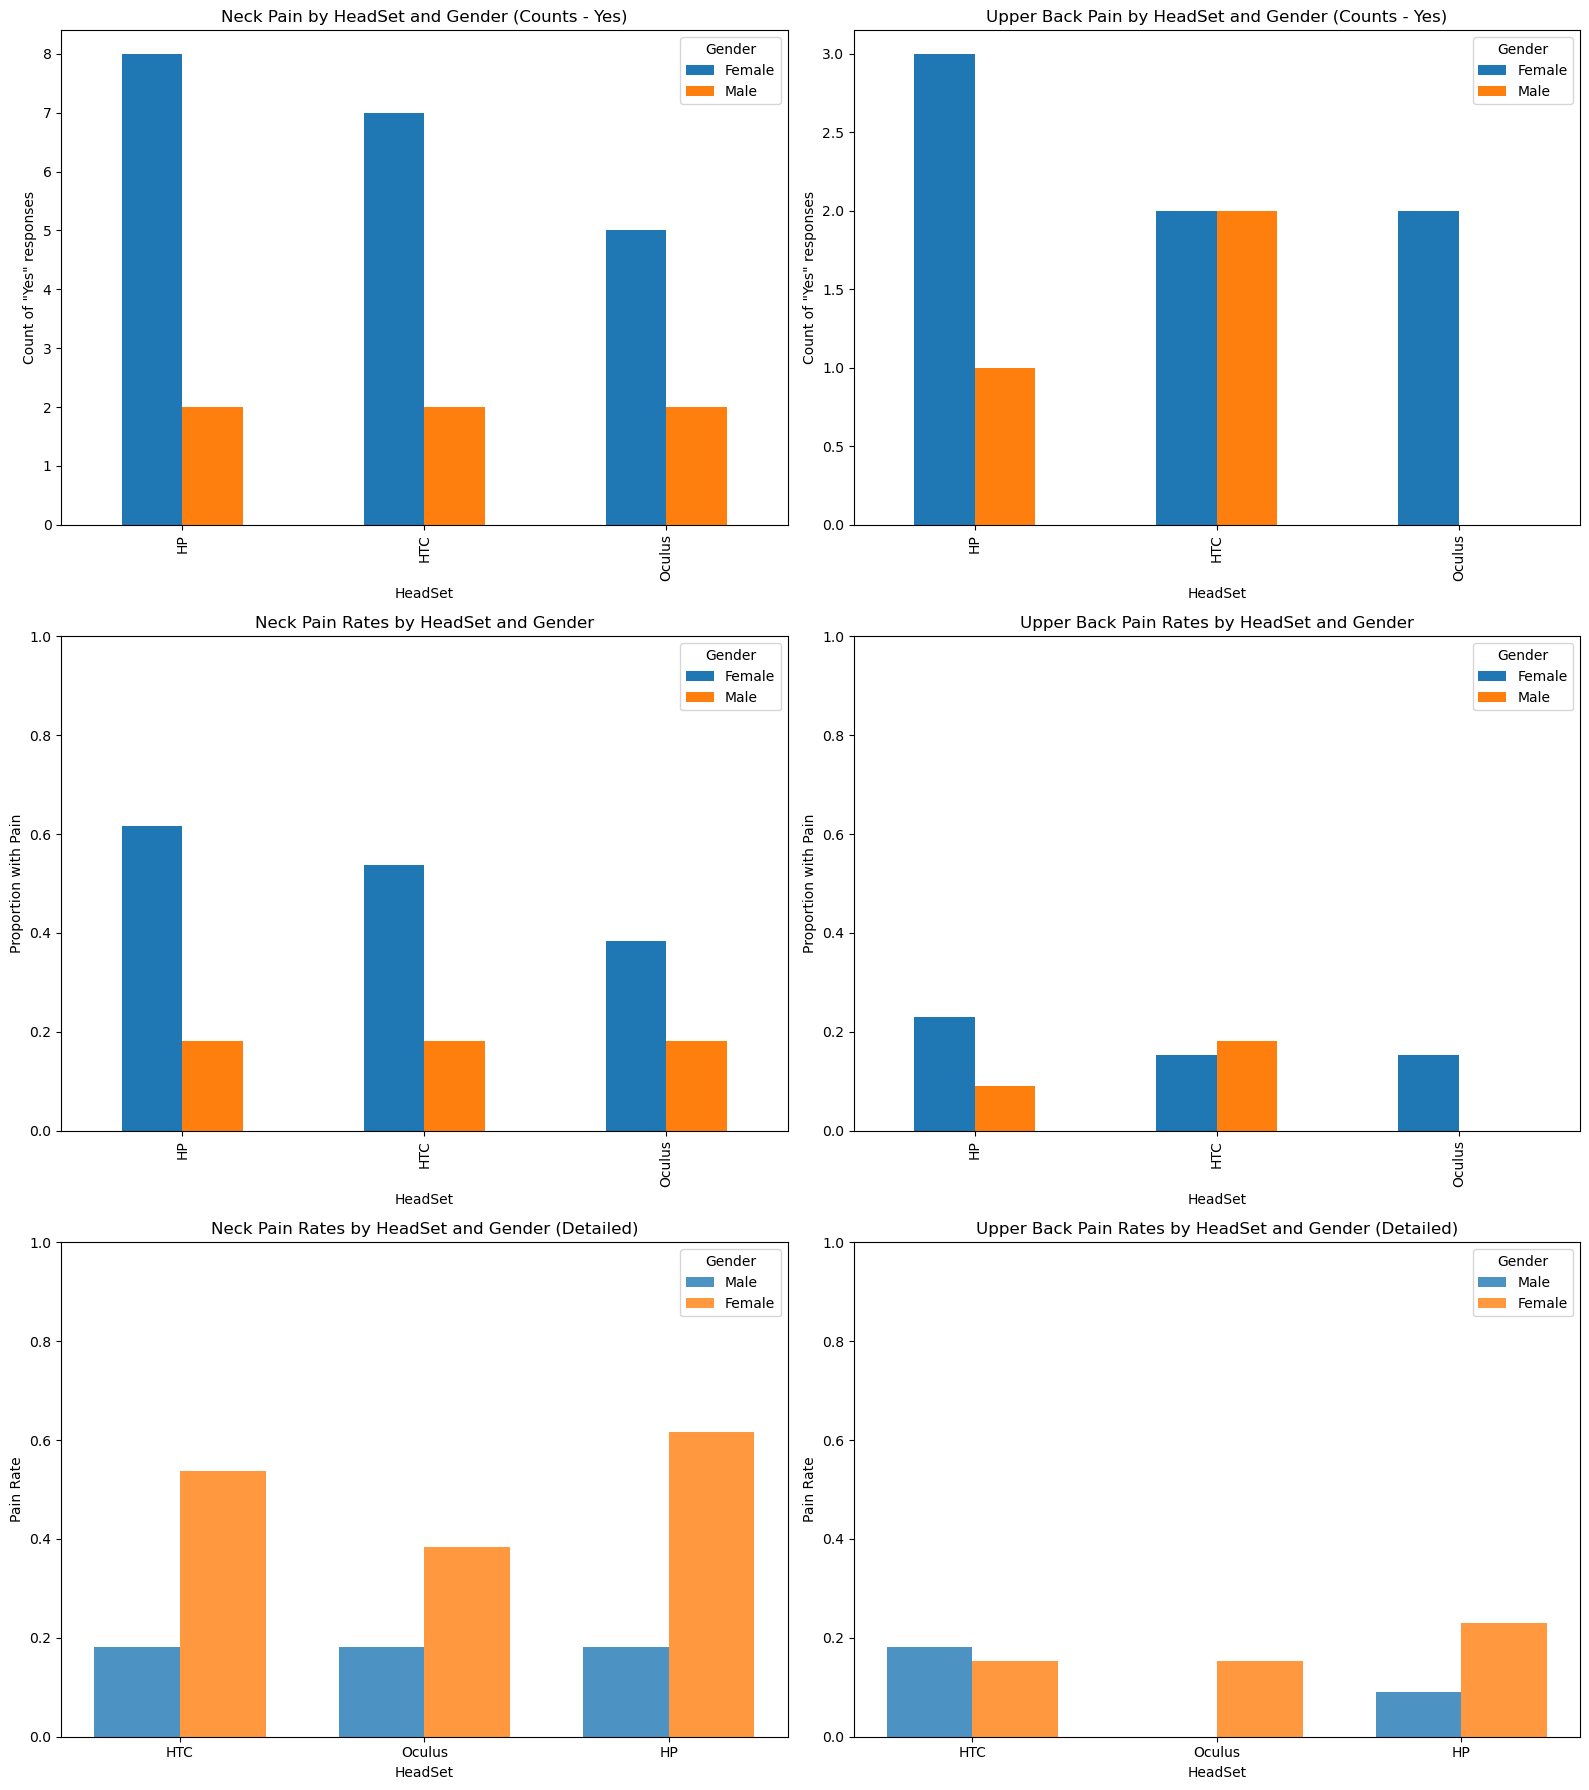


ENHANCED SUMMARY TABLE FOR PAIN ANALYSIS WITH GENDER
     Location Overall_Rate       HeadSet_Test HeadSet_Stat HeadSet_p  \
0        Neck        0.361         Chi-square       0.8428    0.6561   
1  Upper Back        0.139  Insufficient data          N/A       N/A   

      Gender_Test Gender_Stat Gender_p  
0      Chi-square      7.1146   0.0076  
1  Fisher's exact      0.4571   0.3263  

DETAILED PAIN RATES BREAKDOWN

Neck Pain Rates:
By HeadSet:
  HP: 0.417 (10/24)
  HTC: 0.375 (9/24)
  Oculus: 0.292 (7/24)
By Gender:
  Female: 0.513 (20/39)
  Male: 0.182 (6/33)
By HeadSet and Gender:
  HTC - Male: 0.182 (2/11)
  HTC - Female: 0.538 (7/13)
  Oculus - Male: 0.182 (2/11)
  Oculus - Female: 0.385 (5/13)
  HP - Male: 0.182 (2/11)
  HP - Female: 0.615 (8/13)

Upper Back Pain Rates:
By HeadSet:
  HP: 0.167 (4/24)
  HTC: 0.167 (4/24)
  Oculus: 0.083 (2/24)
By Gender:
  Female: 0.179 (7/39)
  Male: 0.091 (3/33)
By HeadSet and Gender:
  HTC - Male: 0.182 (2/11)
  HTC - Female: 0.154 (2/13)

In [41]:
# ============================================================================
# BINARY OUTCOME ANALYSIS WITH GENDER: "Did you experience pain"
# ============================================================================

from scipy.stats import chi2_contingency, fisher_exact
from statsmodels.stats.contingency_tables import mcnemar
import warnings

print("\n" + "="*70)
print("BINARY OUTCOME ANALYSIS WITH GENDER: DID YOU EXPERIENCE PAIN")
print("="*70)

# Check the pain columns
pain_columns = [col for col in df.columns if 'Did you experience pain' in col]
print(f"Pain columns found: {pain_columns}")

# Let's examine the data structure for pain columns
for col in pain_columns:
    print(f"\n{col}:")
    print(df[col].value_counts())

# Clean the data for pain analysis including gender
df_pain = df.dropna(subset=['UniqueID', 'HeadSet', 'Gender'] + pain_columns).copy()

print(f"\nData after removing missing values: {len(df_pain)} observations")
print(f"Unique participants: {df_pain['UniqueID'].nunique()}")
print(f"Gender distribution: {df_pain['Gender'].value_counts()}")

# ============================================================================
# ANALYSIS FOR EACH PAIN LOCATION WITH GENDER
# ============================================================================

for pain_col in pain_columns:
    location = "Neck" if "pain" in pain_col and pain_col.endswith("pain") else "Upper Back"
    
    print(f"\n{'='*60}")
    print(f"ANALYSIS FOR {location.upper()} PAIN WITH GENDER")
    print(f"{'='*60}")
    
    # 1. Overall contingency table by HeadSet
    print(f"\n1. HEADSET EFFECT (ignoring gender):")
    print("-" * 40)
    contingency_table = pd.crosstab(df_pain['HeadSet'], df_pain[pain_col], margins=True)
    print(f"Contingency Table for {location} Pain:")
    print(contingency_table)
    
    # Calculate proportions
    prop_table = pd.crosstab(df_pain['HeadSet'], df_pain[pain_col], normalize='index')
    print(f"\nProportion Table for {location} Pain (by HeadSet):")
    print(prop_table.round(3))
    
    # 2. Contingency table by Gender
    print(f"\n2. GENDER EFFECT (ignoring headset):")
    print("-" * 40)
    gender_contingency = pd.crosstab(df_pain['Gender'], df_pain[pain_col], margins=True)
    print(f"Contingency Table for {location} Pain by Gender:")
    print(gender_contingency)
    
    gender_prop_table = pd.crosstab(df_pain['Gender'], df_pain[pain_col], normalize='index')
    print(f"\nProportion Table for {location} Pain by Gender:")
    print(gender_prop_table.round(3))
    
    # 3. Three-way contingency table (HeadSet × Gender × Pain)
    print(f"\n3. THREE-WAY ANALYSIS (HeadSet × Gender × Pain):")
    print("-" * 50)
    
    # Create three-way table
    three_way = pd.crosstab([df_pain['HeadSet'], df_pain['Gender']], df_pain[pain_col])
    print(f"Three-way Table for {location} Pain:")
    print(three_way)
    
    # Proportions within each HeadSet-Gender combination
    three_way_prop = pd.crosstab([df_pain['HeadSet'], df_pain['Gender']], df_pain[pain_col], normalize='index')
    print(f"\nProportions within each HeadSet-Gender combination:")
    print(three_way_prop.round(3))
    
    # 4. Statistical Tests
    print(f"\n4. STATISTICAL TESTS FOR {location.upper()} PAIN:")
    print("-" * 50)
    
    # Test 1: HeadSet effect (ignoring gender)
    cont_table_headset = pd.crosstab(df_pain['HeadSet'], df_pain[pain_col])
    if cont_table_headset.min().min() >= 5:
        chi2_hs, p_hs, dof_hs, expected_hs = chi2_contingency(cont_table_headset)
        print(f"HeadSet Effect - Chi-square: {chi2_hs:.4f}, p = {p_hs:.4f}, Significant: {'Yes' if p_hs < 0.05 else 'No'}")
    else:
        print("HeadSet Effect - Chi-square not appropriate (expected frequencies < 5)")
    
    # Test 2: Gender effect (ignoring headset)
    cont_table_gender = pd.crosstab(df_pain['Gender'], df_pain[pain_col])
    if cont_table_gender.min().min() >= 5:
        chi2_g, p_g, dof_g, expected_g = chi2_contingency(cont_table_gender)
        print(f"Gender Effect - Chi-square: {chi2_g:.4f}, p = {p_g:.4f}, Significant: {'Yes' if p_g < 0.05 else 'No'}")
    else:
        if cont_table_gender.shape == (2, 2):
            odds_ratio_g, p_fisher_g = fisher_exact(cont_table_gender)
            print(f"Gender Effect - Fisher's exact: p = {p_fisher_g:.4f}, OR = {odds_ratio_g:.4f}, Significant: {'Yes' if p_fisher_g < 0.05 else 'No'}")
        else:
            print("Gender Effect - Insufficient data for statistical test")
    
    # Test 3: Three-way log-linear analysis (if sufficient data)
    try:
        # Create a DataFrame for log-linear analysis
        pain_binary = (df_pain[pain_col] == 'Yes').astype(int)
        
        # Count table for each combination
        counts = df_pain.groupby(['HeadSet', 'Gender'])[pain_col].apply(lambda x: (x == 'Yes').sum()).reset_index()
        totals = df_pain.groupby(['HeadSet', 'Gender']).size().reset_index(name='total')
        combined = counts.merge(totals, on=['HeadSet', 'Gender'])
        combined['no_pain'] = combined['total'] - combined[pain_col]
        
        print(f"\nDetailed breakdown by HeadSet and Gender:")
        for _, row in combined.iterrows():
            pain_rate = row[pain_col] / row['total']
            print(f"{row['HeadSet']} - {row['Gender']}: {row[pain_col]}/{row['total']} ({pain_rate:.3f})")
        
    except Exception as e:
        print(f"Three-way analysis error: {e}")
    
    # 5. Stratified analysis by gender
    print(f"\n5. STRATIFIED ANALYSIS BY GENDER:")
    print("-" * 40)
    
    for gender in df_pain['Gender'].unique():
        print(f"\nAnalysis for {gender}s only:")
        gender_data = df_pain[df_pain['Gender'] == gender]
        
        if len(gender_data) > 0:
            gender_headset_table = pd.crosstab(gender_data['HeadSet'], gender_data[pain_col])
            print(f"Contingency table for {gender}s:")
            print(gender_headset_table)
            
            if gender_headset_table.shape[0] > 1 and gender_headset_table.shape[1] > 1:
                if gender_headset_table.min().min() >= 5:
                    chi2_gs, p_gs, dof_gs, expected_gs = chi2_contingency(gender_headset_table)
                    print(f"HeadSet effect in {gender}s - Chi-square: {chi2_gs:.4f}, p = {p_gs:.4f}")
                else:
                    print(f"HeadSet effect in {gender}s - Insufficient data for chi-square test")
            else:
                print(f"HeadSet effect in {gender}s - Insufficient variation for analysis")

# ============================================================================
# ENHANCED VISUALIZATION FOR BINARY OUTCOMES WITH GENDER
# ============================================================================

print(f"\n{'='*70}")
print("ENHANCED VISUALIZATIONS WITH GENDER")
print(f"{'='*70}")

# Create enhanced visualizations for pain data with gender
n_pain_cols = len(pain_columns)
fig, axes = plt.subplots(3, n_pain_cols, figsize=(8*n_pain_cols, 18))

if n_pain_cols == 1:
    axes = axes.reshape(-1, 1)

for idx, pain_col in enumerate(pain_columns):
    location = "Neck" if "pain" in pain_col and pain_col.endswith("pain") else "Upper Back"
    
    # 1. Stacked bar chart by HeadSet with Gender breakdown
    pain_gender_counts = pd.crosstab([df_pain['HeadSet'], df_pain['Gender']], df_pain[pain_col])
    
    # Reshape for plotting
    pain_gender_counts_reset = pain_gender_counts.reset_index()
    pain_pivot = pain_gender_counts_reset.pivot(index='HeadSet', columns='Gender', values=['No', 'Yes'])
    
    # Plot Yes responses
    if 'Yes' in pain_pivot.columns.get_level_values(0):
        yes_data = pain_pivot['Yes'].fillna(0)
        yes_data.plot(kind='bar', ax=axes[0, idx], title=f'{location} Pain by HeadSet and Gender (Counts - Yes)')
        axes[0, idx].set_ylabel('Count of "Yes" responses')
        axes[0, idx].legend(title='Gender')
    
    # 2. Proportion plot by HeadSet and Gender
    headset_gender_props = df_pain.groupby(['HeadSet', 'Gender'])[pain_col].apply(lambda x: (x == 'Yes').mean()).reset_index()
    headset_gender_props_pivot = headset_gender_props.pivot(index='HeadSet', columns='Gender', values=pain_col)
    
    headset_gender_props_pivot.plot(kind='bar', ax=axes[1, idx], 
                                   title=f'{location} Pain Rates by HeadSet and Gender')
    axes[1, idx].set_ylabel('Proportion with Pain')
    axes[1, idx].set_ylim(0, 1)
    axes[1, idx].legend(title='Gender')
    
    # 3. Gender comparison within each headset
    x_positions = np.arange(len(df_pain['HeadSet'].unique()))
    width = 0.35
    
    for i, gender in enumerate(df_pain['Gender'].unique()):
        gender_rates = []
        for headset in df_pain['HeadSet'].unique():
            subset = df_pain[(df_pain['HeadSet'] == headset) & (df_pain['Gender'] == gender)]
            if len(subset) > 0:
                rate = (subset[pain_col] == 'Yes').mean()
            else:
                rate = 0
            gender_rates.append(rate)
        
        axes[2, idx].bar(x_positions + i*width, gender_rates, width, 
                        label=gender, alpha=0.8)
    
    axes[2, idx].set_title(f'{location} Pain Rates by HeadSet and Gender (Detailed)')
    axes[2, idx].set_ylabel('Pain Rate')
    axes[2, idx].set_xlabel('HeadSet')
    axes[2, idx].set_xticks(x_positions + width/2)
    axes[2, idx].set_xticklabels(df_pain['HeadSet'].unique())
    axes[2, idx].legend(title='Gender')
    axes[2, idx].set_ylim(0, 1)

plt.tight_layout()
plt.show()

# ============================================================================
# ENHANCED SUMMARY TABLE FOR BINARY OUTCOMES WITH GENDER
# ============================================================================

print(f"\n{'='*80}")
print("ENHANCED SUMMARY TABLE FOR PAIN ANALYSIS WITH GENDER")
print(f"{'='*80}")

summary_pain_gender = []

for pain_col in pain_columns:
    location = "Neck" if "pain" in pain_col and pain_col.endswith("pain") else "Upper Back"
    
    # Overall pain rate
    overall_rate = (df_pain[pain_col] == 'Yes').mean()
    
    # Pain rates by headset
    headset_rates = df_pain.groupby('HeadSet')[pain_col].apply(lambda x: (x == 'Yes').mean())
    
    # Pain rates by gender
    gender_rates = df_pain.groupby('Gender')[pain_col].apply(lambda x: (x == 'Yes').mean())
    
    # Pain rates by headset and gender
    headset_gender_rates = df_pain.groupby(['HeadSet', 'Gender'])[pain_col].apply(lambda x: (x == 'Yes').mean())
    
    # Statistical tests
    # HeadSet effect
    cont_table_hs = pd.crosstab(df_pain['HeadSet'], df_pain[pain_col])
    if cont_table_hs.min().min() >= 5:
        chi2_hs, p_hs, _, _ = chi2_contingency(cont_table_hs)
        hs_test = "Chi-square"
        hs_stat = chi2_hs
    else:
        hs_test = "Insufficient data"
        hs_stat = np.nan
        p_hs = np.nan
    
    # Gender effect
    cont_table_g = pd.crosstab(df_pain['Gender'], df_pain[pain_col])
    if cont_table_g.min().min() >= 5:
        chi2_g, p_g, _, _ = chi2_contingency(cont_table_g)
        g_test = "Chi-square"
        g_stat = chi2_g
    elif cont_table_g.shape == (2, 2):
        g_stat, p_g = fisher_exact(cont_table_g)
        g_test = "Fisher's exact"
    else:
        g_test = "Insufficient data"
        g_stat = np.nan
        p_g = np.nan
    
    summary_pain_gender.append({
        'Location': location,
        'Overall_Rate': f"{overall_rate:.3f}",
        'HeadSet_Test': hs_test,
        'HeadSet_Stat': f"{hs_stat:.4f}" if not np.isnan(hs_stat) else "N/A",
        'HeadSet_p': f"{p_hs:.4f}" if not np.isnan(p_hs) else "N/A",
        'Gender_Test': g_test,
        'Gender_Stat': f"{g_stat:.4f}" if not np.isnan(g_stat) else "N/A",
        'Gender_p': f"{p_g:.4f}" if not np.isnan(p_g) else "N/A"
    })

summary_pain_gender_df = pd.DataFrame(summary_pain_gender)
print(summary_pain_gender_df)

# Detailed rates breakdown
print(f"\n{'='*60}")
print("DETAILED PAIN RATES BREAKDOWN")
print(f"{'='*60}")

for pain_col in pain_columns:
    location = "Neck" if "pain" in pain_col and pain_col.endswith("pain") else "Upper Back"
    print(f"\n{location} Pain Rates:")
    
    # By HeadSet
    print("By HeadSet:")
    headset_rates = df_pain.groupby('HeadSet')[pain_col].apply(lambda x: (x == 'Yes').mean())
    for hs, rate in headset_rates.items():
        count = df_pain[df_pain['HeadSet'] == hs]
        yes_count = (count[pain_col] == 'Yes').sum()
        total_count = len(count)
        print(f"  {hs}: {rate:.3f} ({yes_count}/{total_count})")
    
    # By Gender
    print("By Gender:")
    gender_rates = df_pain.groupby('Gender')[pain_col].apply(lambda x: (x == 'Yes').mean())
    for gender, rate in gender_rates.items():
        count = df_pain[df_pain['Gender'] == gender]
        yes_count = (count[pain_col] == 'Yes').sum()
        total_count = len(count)
        print(f"  {gender}: {rate:.3f} ({yes_count}/{total_count})")
    
    # By HeadSet and Gender
    print("By HeadSet and Gender:")
    for hs in df_pain['HeadSet'].unique():
        for gender in df_pain['Gender'].unique():
            subset = df_pain[(df_pain['HeadSet'] == hs) & (df_pain['Gender'] == gender)]
            if len(subset) > 0:
                rate = (subset[pain_col] == 'Yes').mean()
                yes_count = (subset[pain_col] == 'Yes').sum()
                total_count = len(subset)
                print(f"  {hs} - {gender}: {rate:.3f} ({yes_count}/{total_count})")